In [122]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

In [100]:
# Load the dataset
data = pd.read_csv('symbipredict_2022.csv')

# Display the first few rows of the dataset
print(data.head())

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [101]:
# Identify columns with missing values
missing_values = data.isnull().sum()

In [102]:
missing_values

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [103]:
X = data.drop('prognosis', axis=1)
y = data['prognosis']

In [104]:
#'prognosis' is the target variable and it is categorical so we labelling it
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [105]:
data.query('muscle_wasting == 1 and patches_in_throat == 1 and high_fever ==1 and extra_marital_contacts==1')

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
60          0          0                     0                    0   
65          0          0                     0                    0   
66          0          0                     0                    0   
470         0          0                     0                    0   
475         0          0                     0                    0   
...       ...        ...                   ...                  ...   
4762        0          0                     0                    0   
4803        0          0                     0                    0   
4844        0          0                     0                    0   
4885        0          0                     0                    0   
4926        0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
60            0       0           0             0        0                 0   
65            0       0           0             0        0                 0   
66            0       0           0             0        0                 0   
470           0       0           0             0        0                 0   
475           0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4762          0       0           0             0        0                 0   
4803          0       0           0             0        0                 0   
4844          0       0           0             0        0                 0   
4885          0       0           0             0        0                 0   
4926          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
60    ...           0         0             0                    0   
65    ...           0         0             0                    0   
66    ...           0         0             0                    0   
470   ...           0         0             0                    0   
475   ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4762  ...           0         0             0                    0   
4803  ...           0         0             0                    0   
4844  ...           0         0             0                    0   
4885  ...           0         0             0                    0   
4926  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
60                       0                   0        0                     0   
65                       0                   0        0                     0   
66                       0                   0        0                     0   
470                      0                   0        0                     0   
475                      0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4762                     0                   0        0                     0   
4803                     0                   0        0                     0   
4844                     0                   0        0                     0   
4885                     0                   0        0                     0   
4926                     0                   0        0                     0   

      yellow_crust_ooze  prognosis  
60                    0       AIDS  
65                    0       AIDS  
66                    0       AIDS  
470                   0       AIDS  
475                   0       AIDS  
...                 ...        ...  
4762                  0       AIDS  
4803                  0       AIDS  
4844                  0       AIDS  
4885    

## Exploratory Data Analysis (EDA)

In [118]:
# Compute descriptive statistics for each symptom and disease
descriptive_stats = data.describe()
print(descriptive_stats)

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4961.000000  4961.000000           4961.000000          4961.000000   
mean      0.137875     0.159847              0.021971             0.045152   
std       0.344804     0.366501              0.146605             0.207659   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4961.000000  4961.000000  4961.000000   4961.000000  4961.000000   
mean      0.021971     0.162266     0.139085      0.045152     0.045152   
std       0.146605     0.368732     0.346070      0.207659     0.207659 

In [120]:
# Identify the most common symptoms
common_symptoms = data.iloc[:, :-1].sum().sort_values(ascending=False)
print("Most Common Symptoms:")
print(common_symptoms.head(10))
print("=========================================")
# Identify the most common diseases
common_diseases = data['prognosis'].value_counts()
print("Most Common Diseases:")
print(common_diseases.head(10))


Most Common Symptoms:
fatigue              1949
vomiting             1931
high_fever           1374
loss_of_appetite     1162
nausea               1156
headache             1144
abdominal_pain       1041
yellowish_skin        920
yellowing_of_eyes     823
chills                805
dtype: int64
Most Common Diseases:
Fungal Infection                 121
Hepatitis C                      121
Hepatitis E                      121
Alcoholic Hepatitis              121
Tuberculosis                     121
Common Cold                      121
Pneumonia                        121
Dimorphic Hemmorhoids (piles)    121
Heart Attack                     121
Varicose Veins                   121
Name: prognosis, dtype: int64


In [124]:
# Calculate correlations between symptoms
symptom_correlations = data.iloc[:, :-1].corr()
print("Symptom Correlations:")
print(symptom_correlations)

Symptom Correlations:
                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318546              0.326935   
skin_rash             0.318546   1.000000              0.298594   
nodal_skin_eruptions  0.326935   0.298594              1.000000   
continuous_sneezing  -0.086962  -0.094852             -0.032593   
shivering            -0.059939  -0.065377             -0.022465   
...                        ...        ...                   ...   
small_dents_in_nails -0.061605   0.331238             -0.023089   
inflammatory_nails   -0.061605   0.331238             -0.023089   
blister              -0.061605   0.331238             -0.023089   
red_sore_around_nose -0.061605   0.331238             -0.023089   
yellow_crust_ooze    -0.061605   0.331238             -0.023089   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086962  -0.059939 -0.176002   -0.160738   
skin_rash        

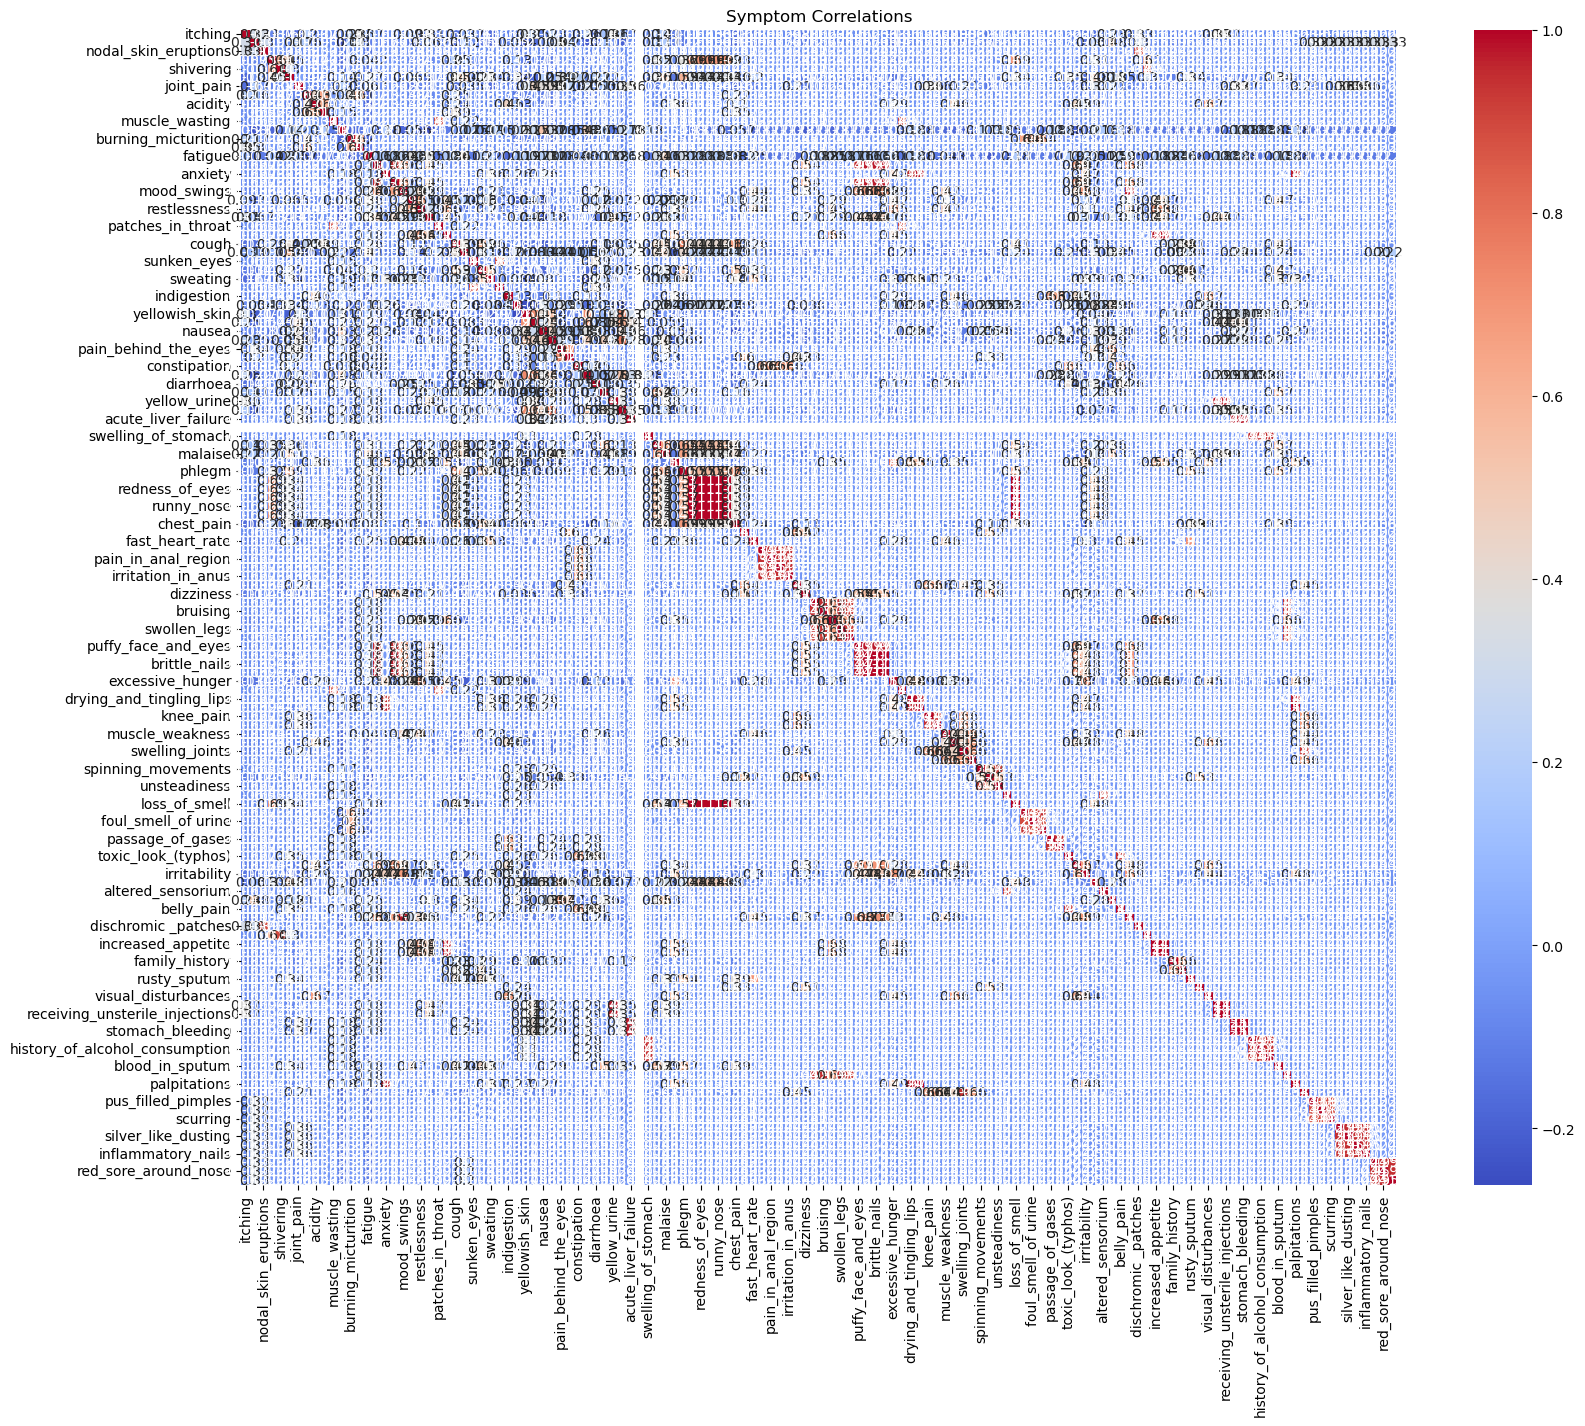

In [125]:
# Visualize correlations using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(symptom_correlations, annot=True, cmap='coolwarm', square=True)
plt.title('Symptom Correlations')
plt.show()

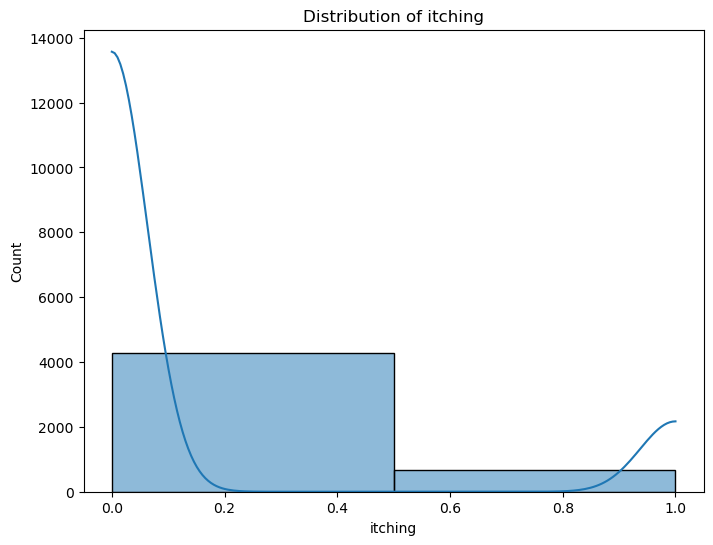

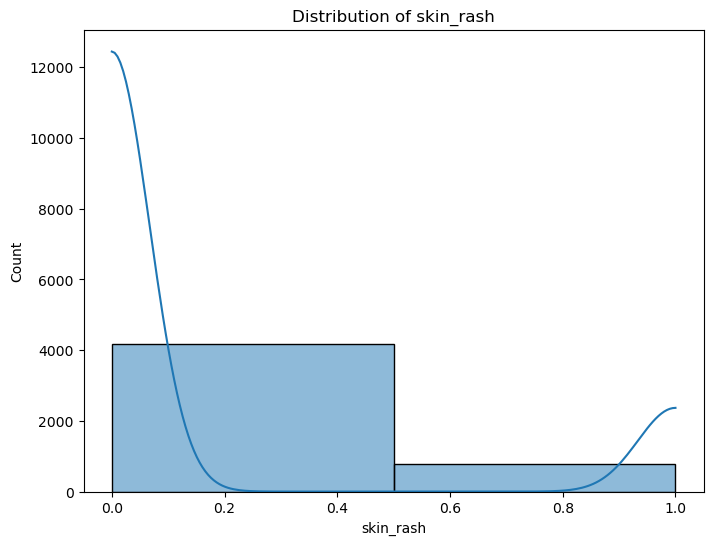

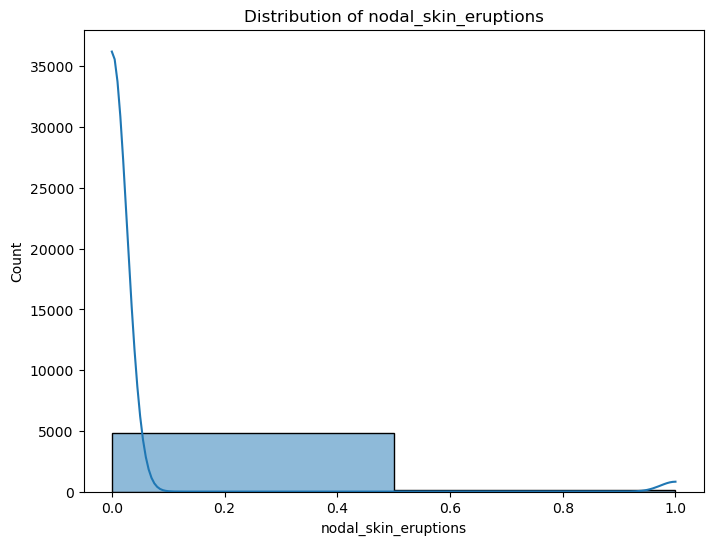

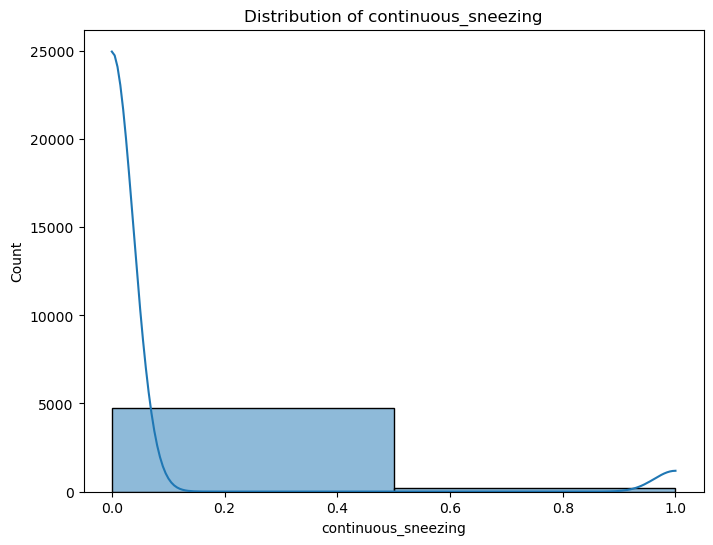

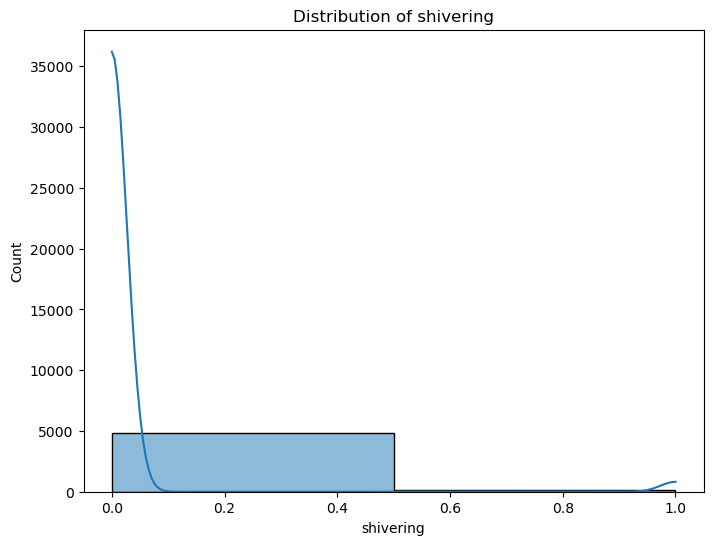

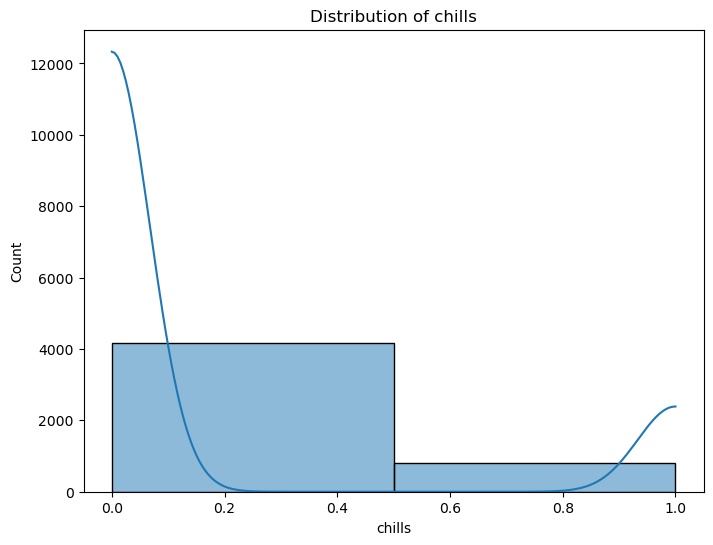

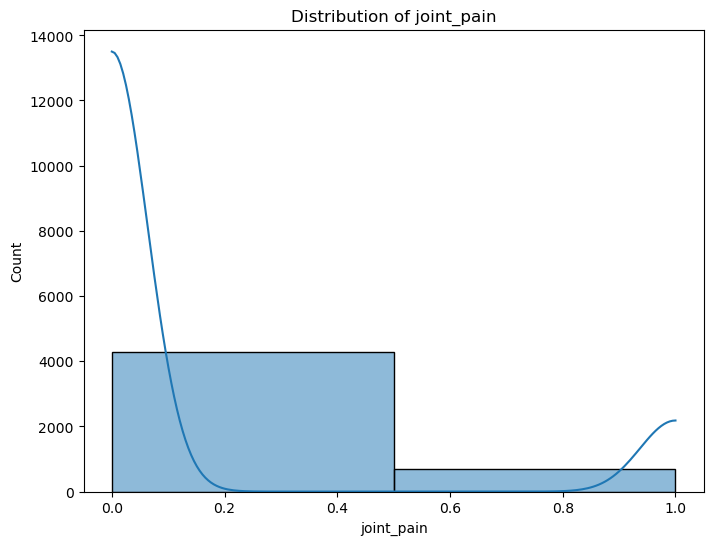

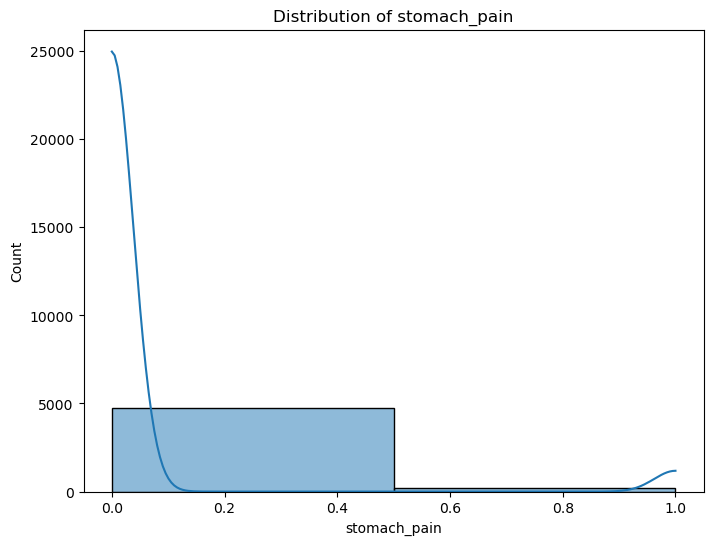

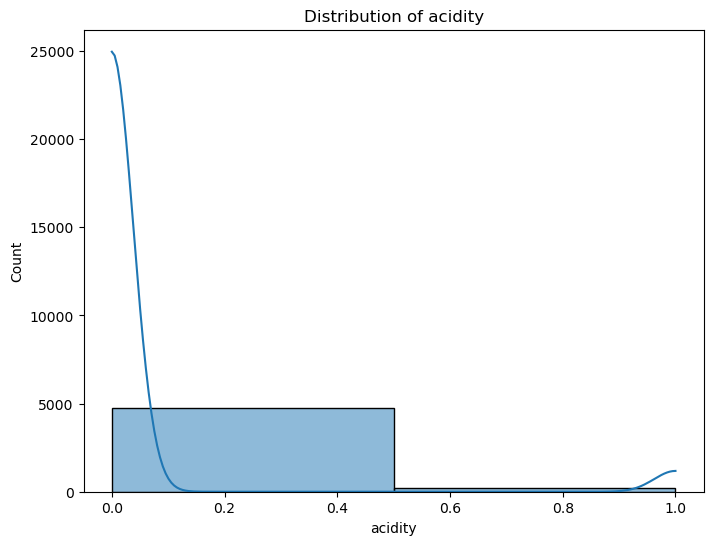

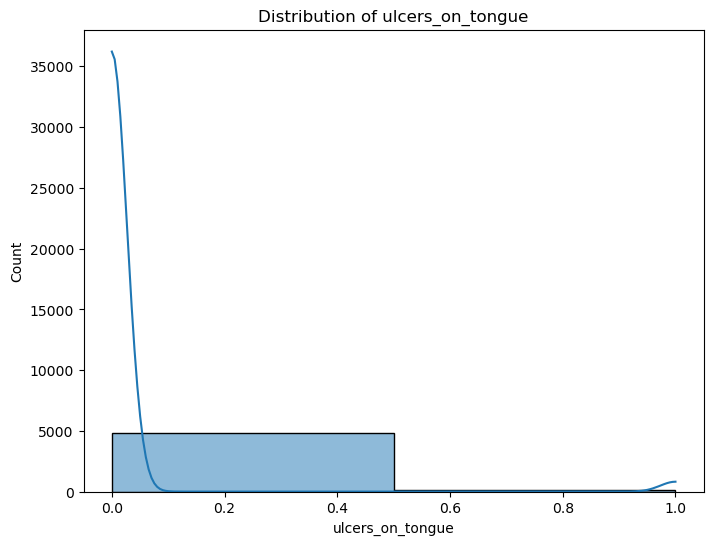

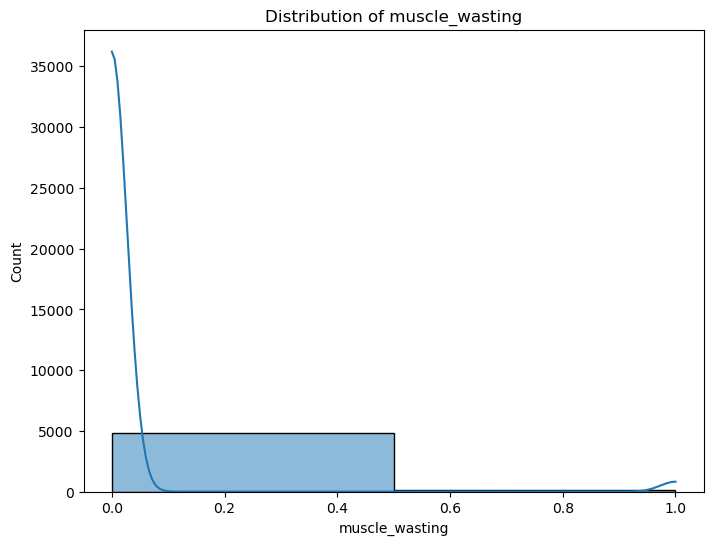

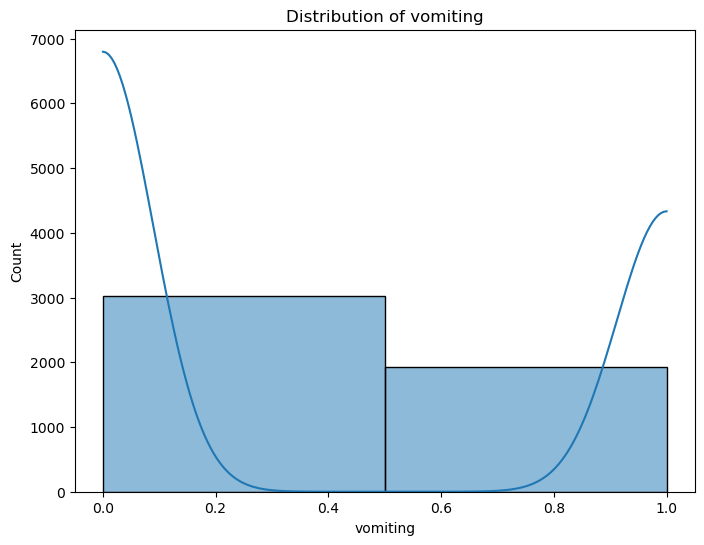

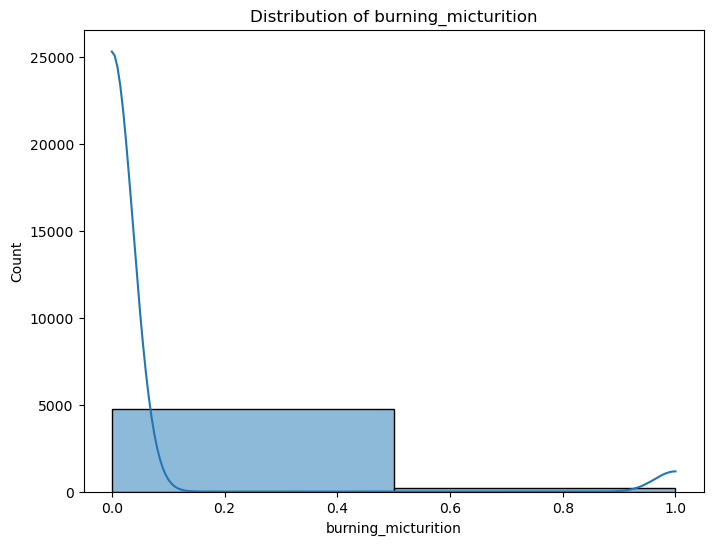

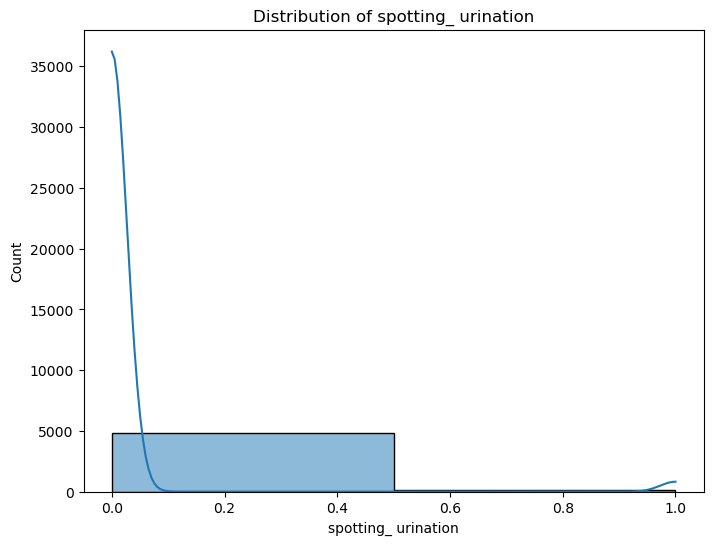

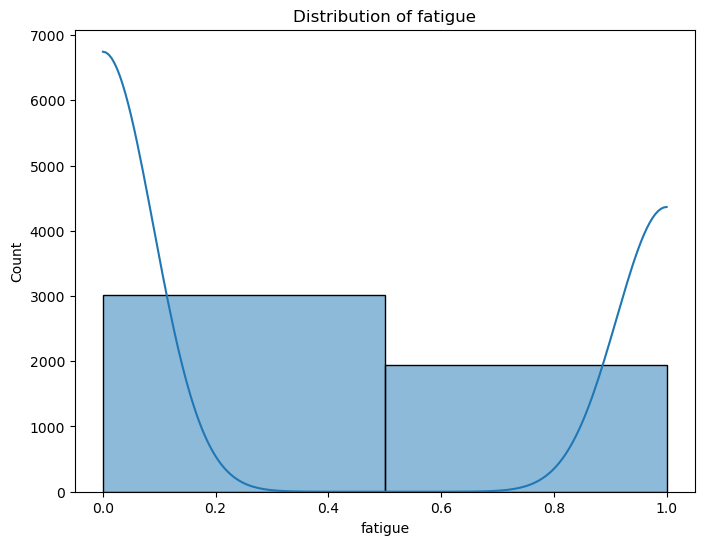

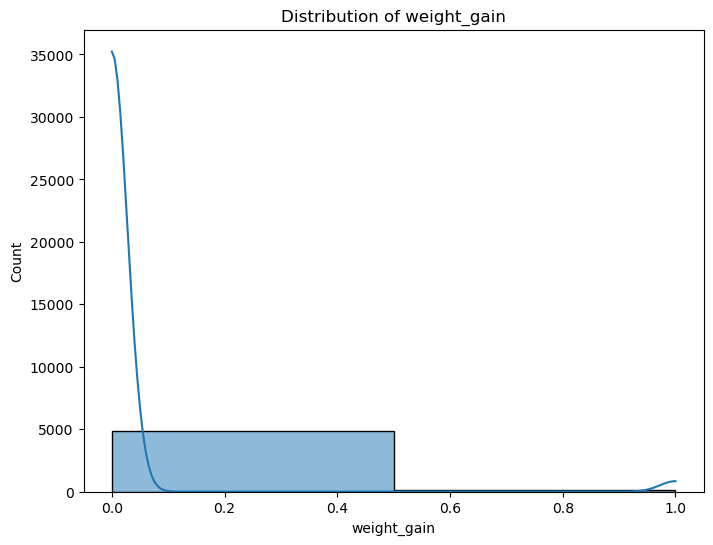

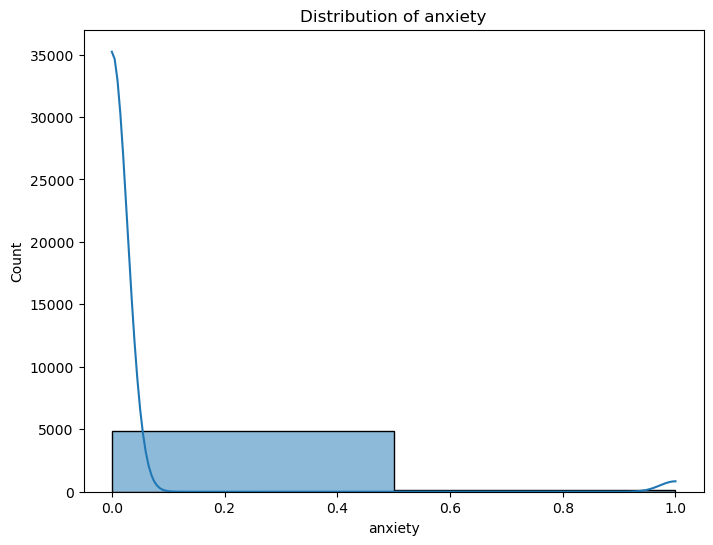

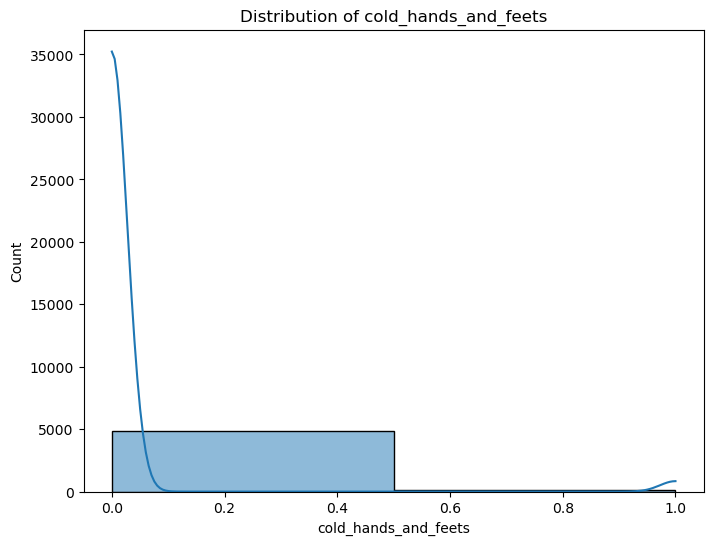

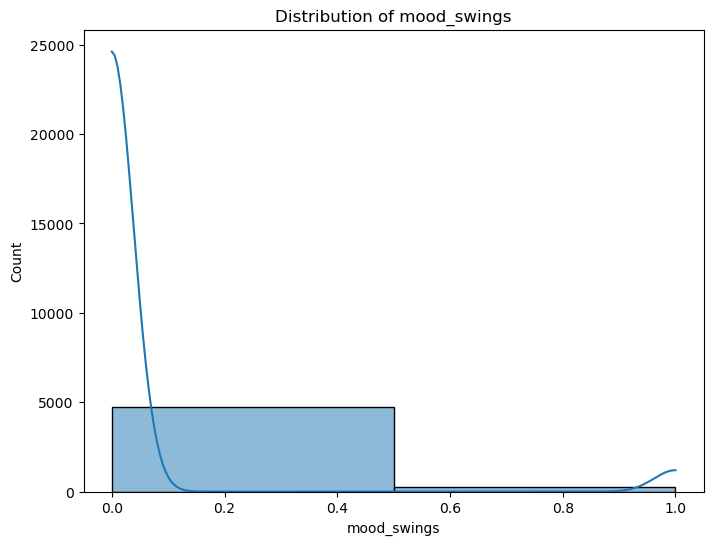

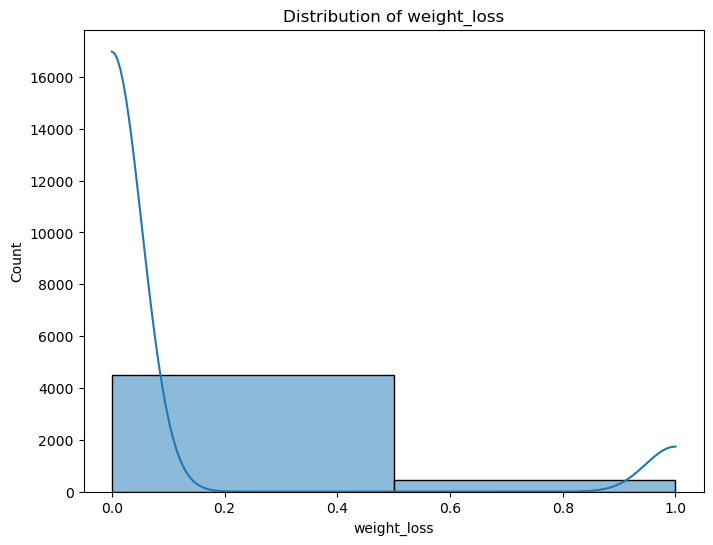

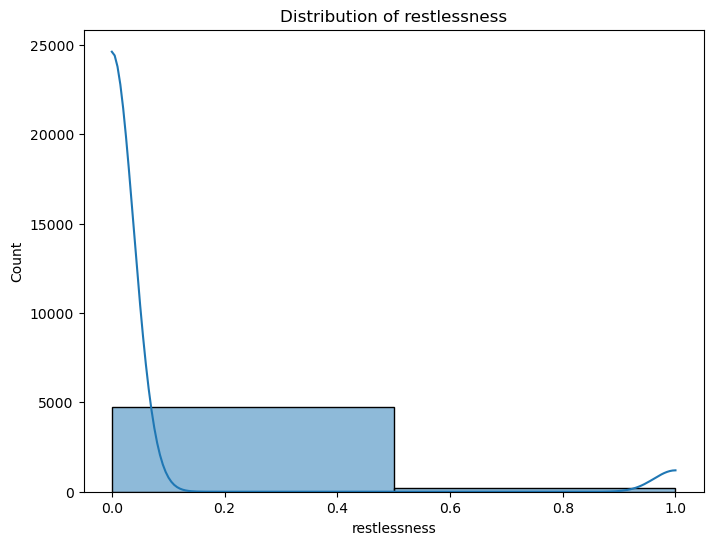

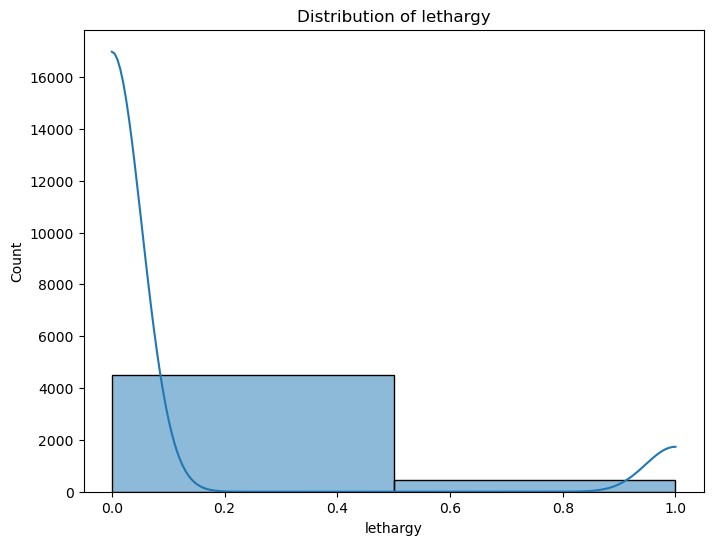

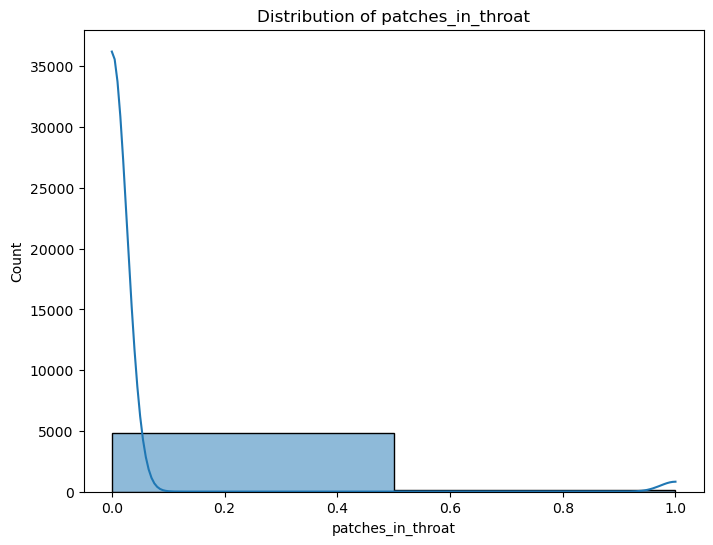

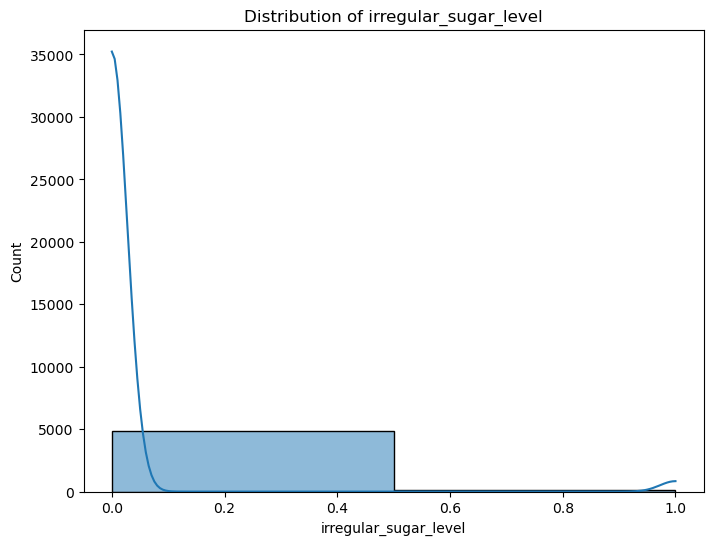

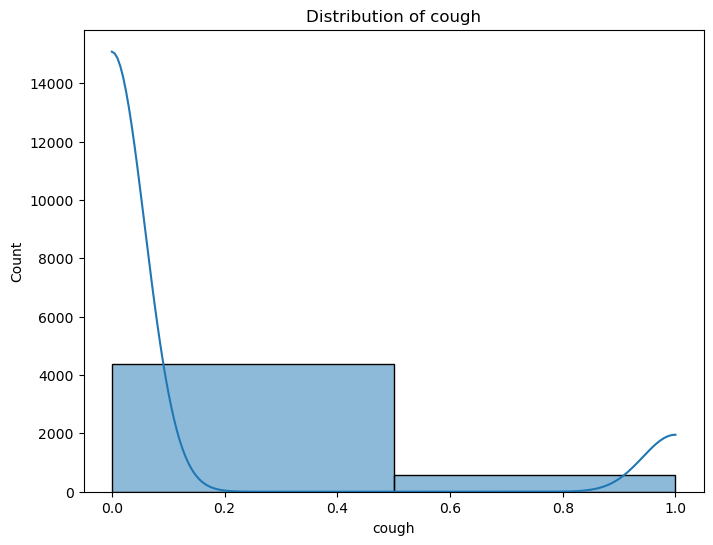

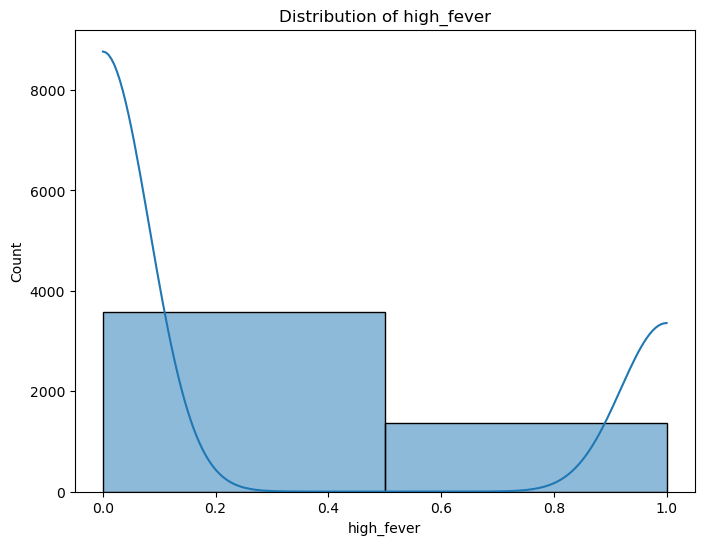

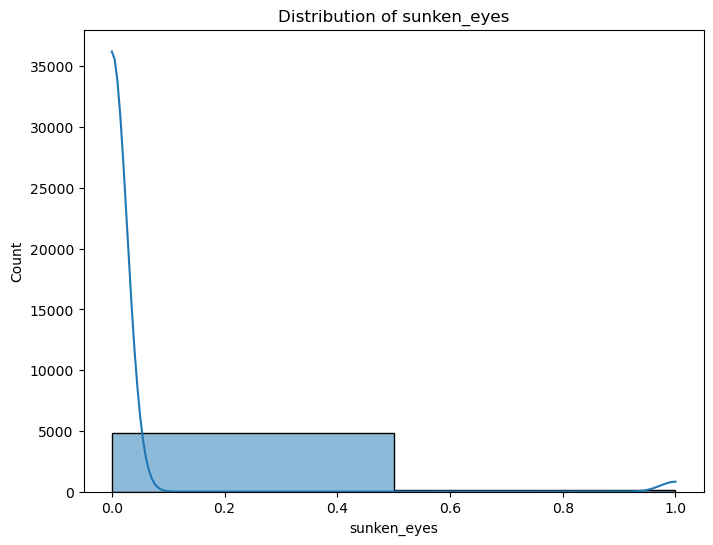

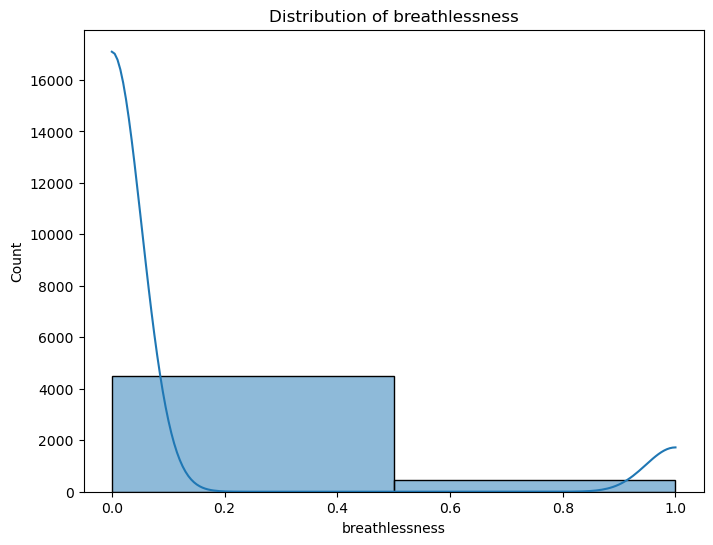

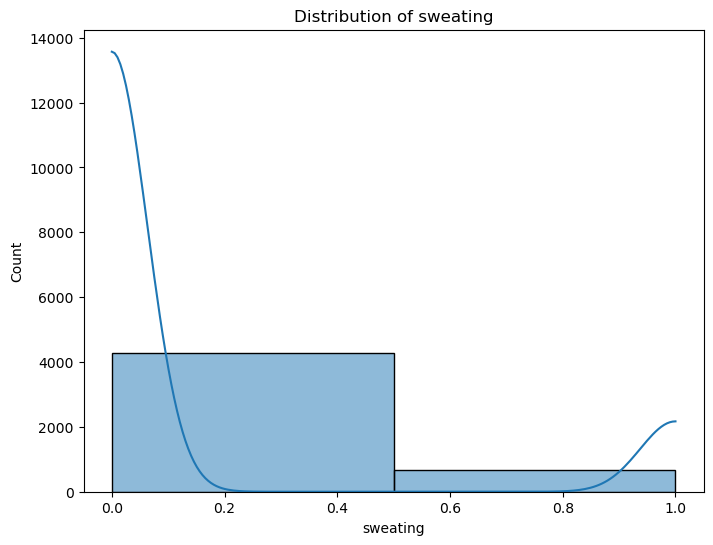

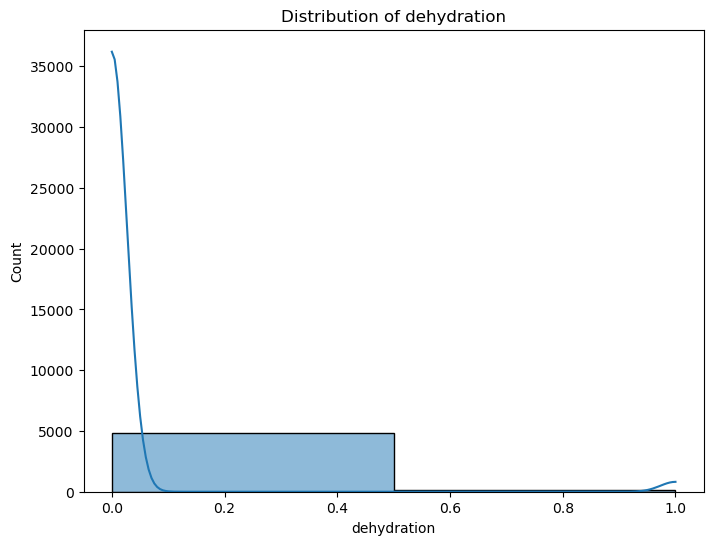

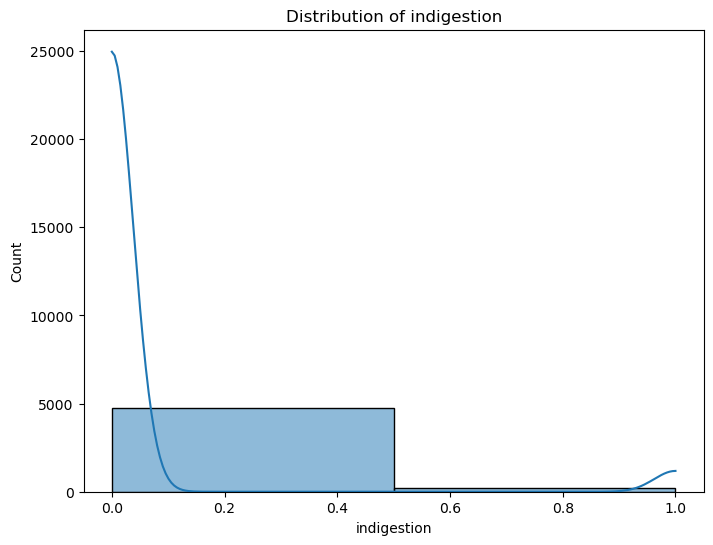

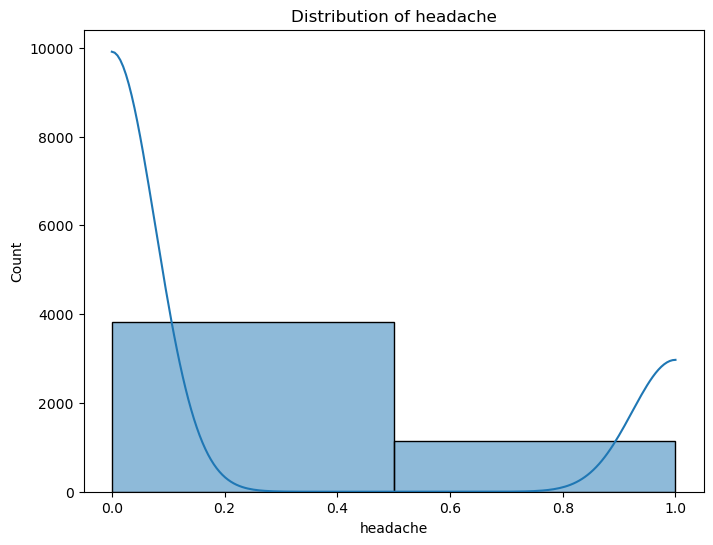

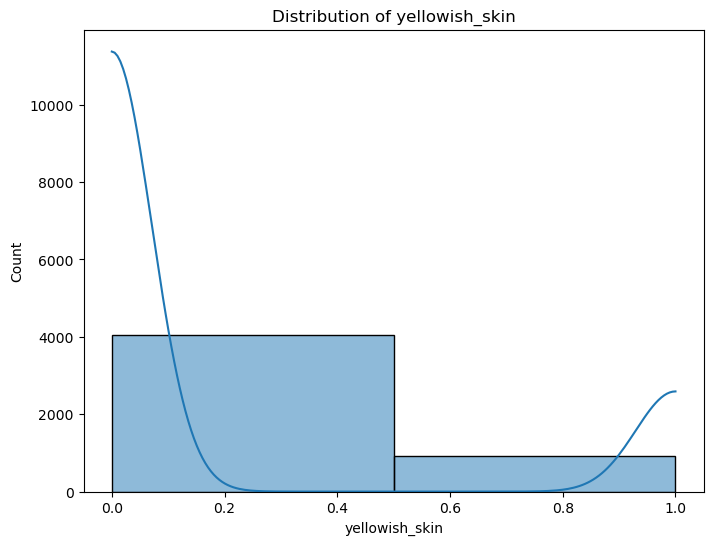

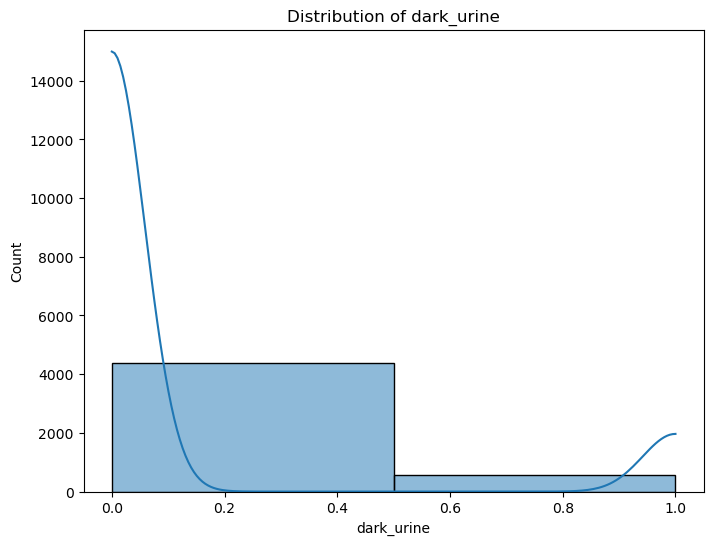

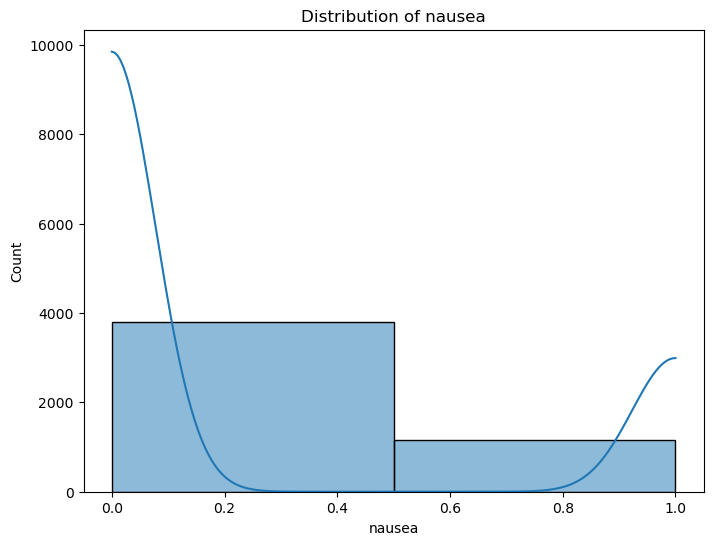

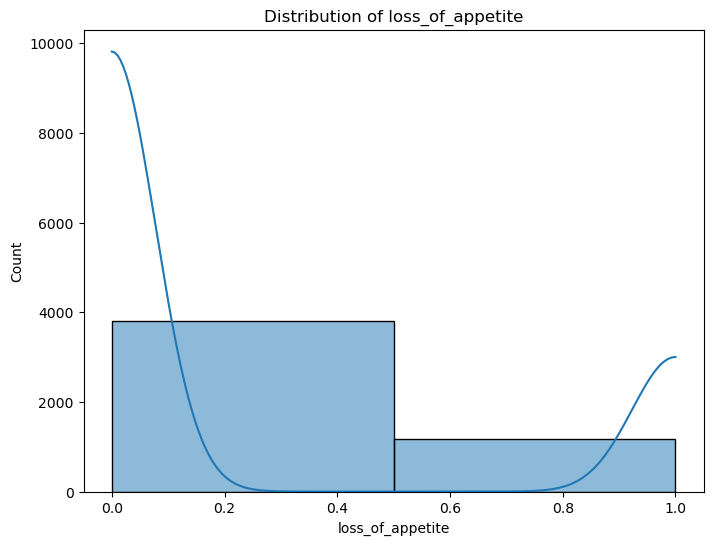

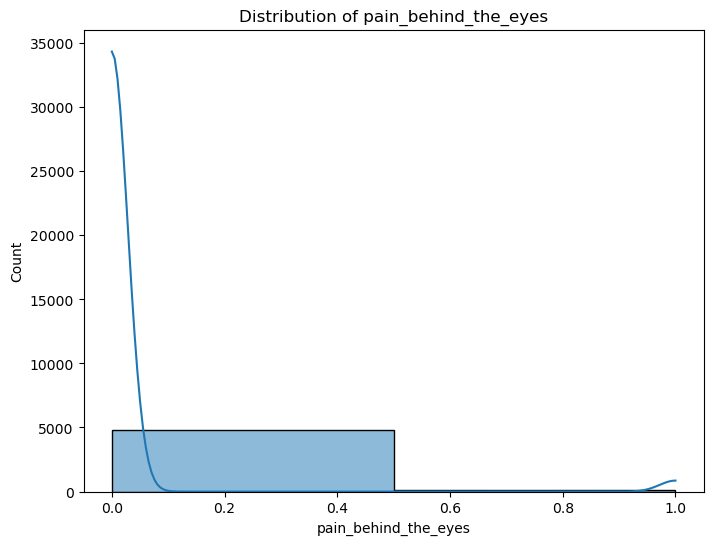

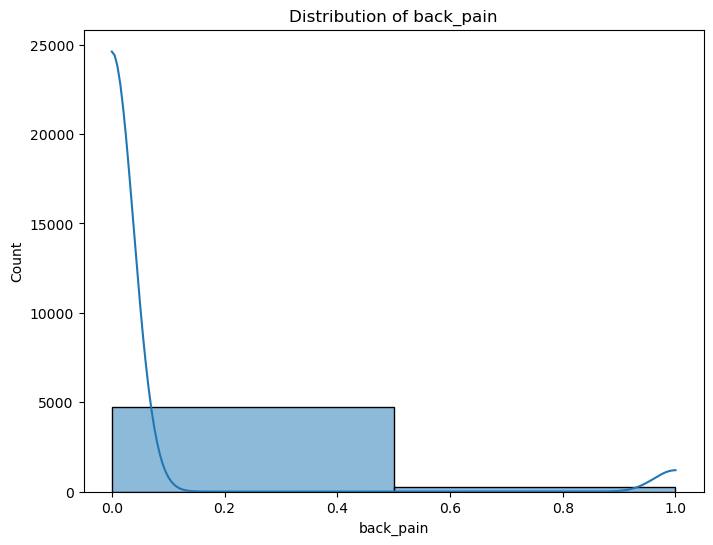

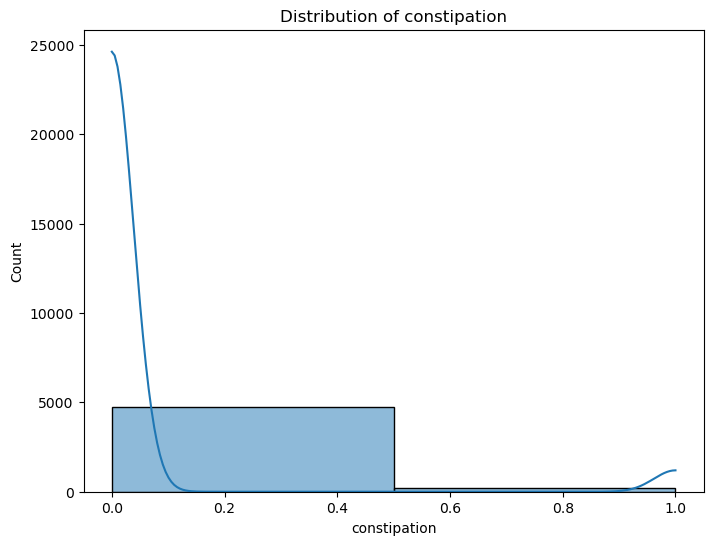

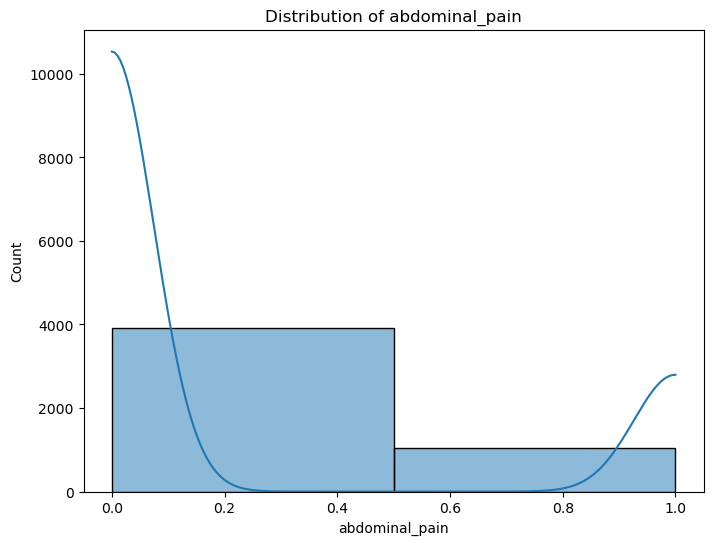

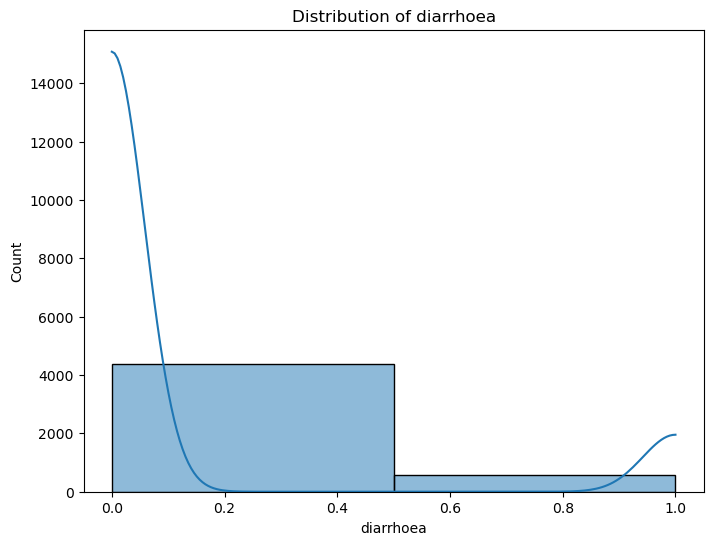

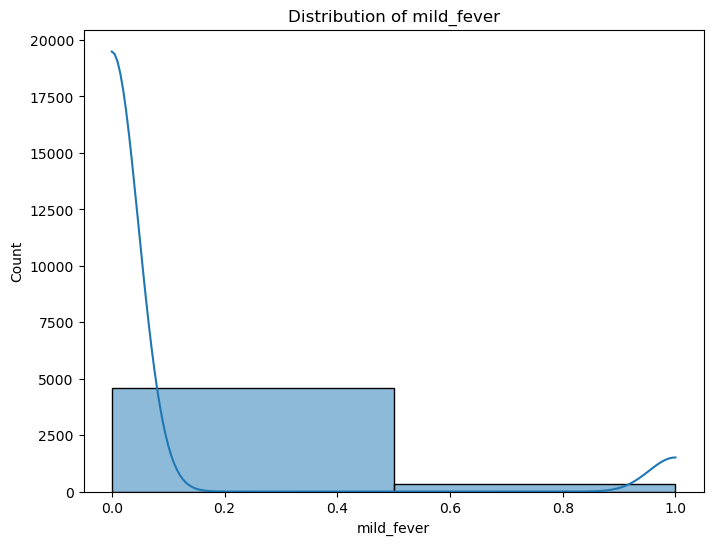

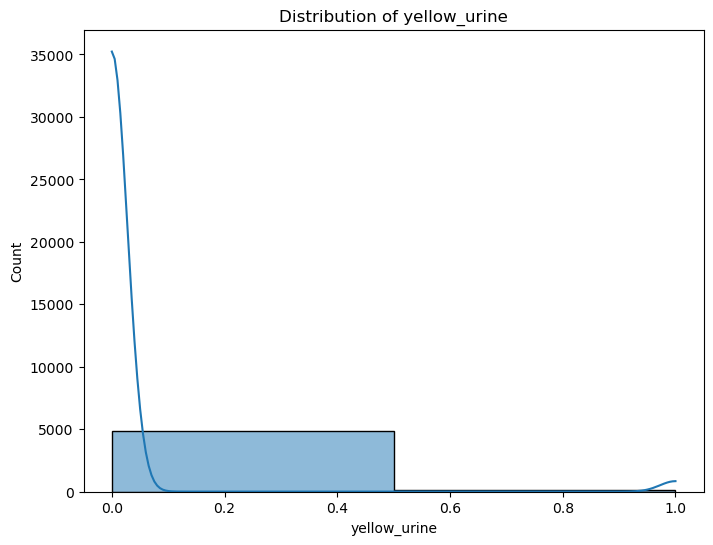

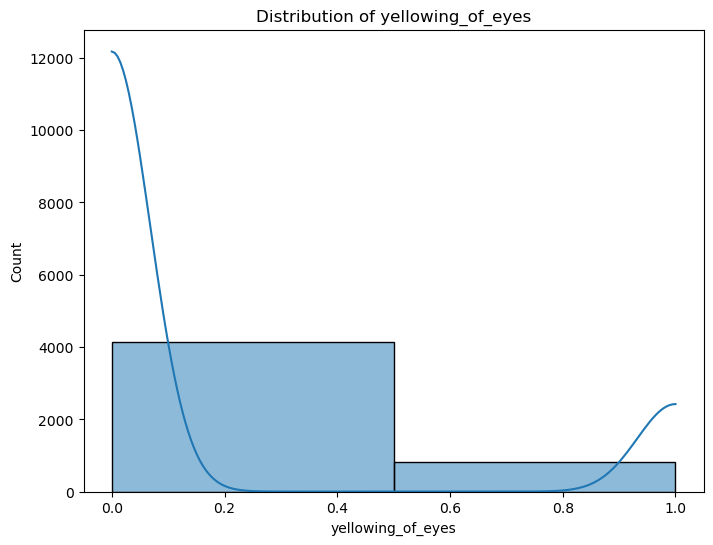

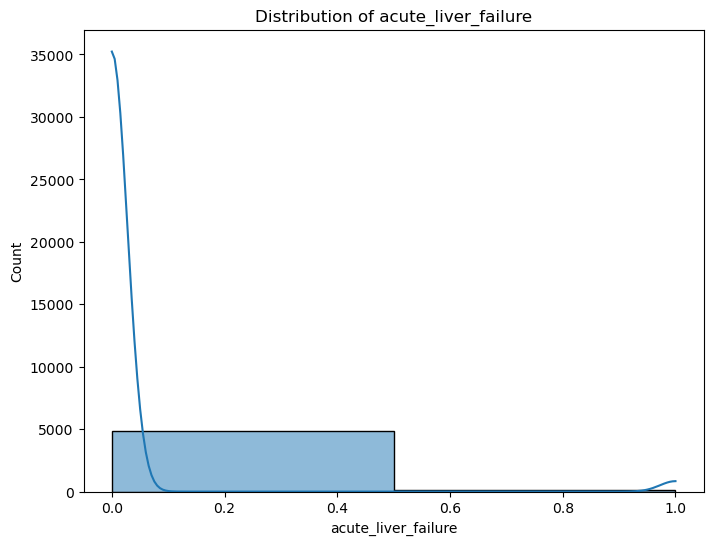

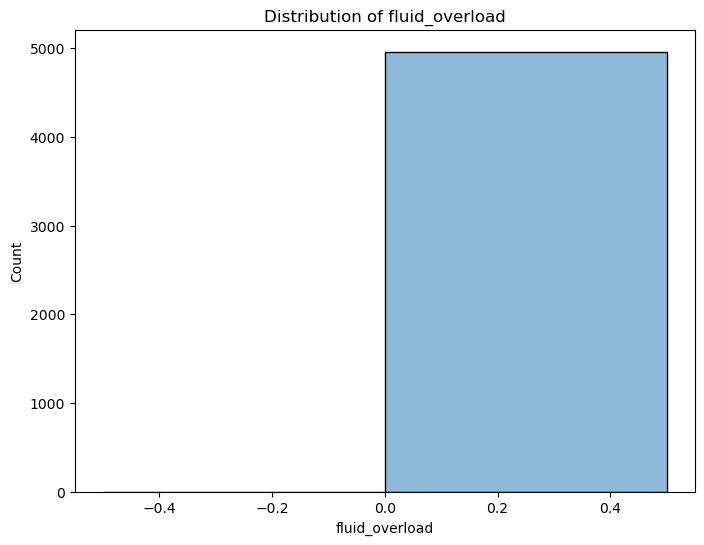

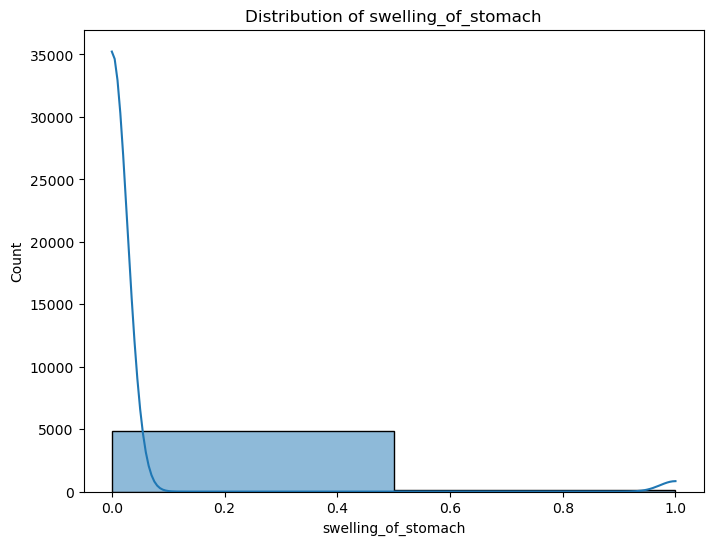

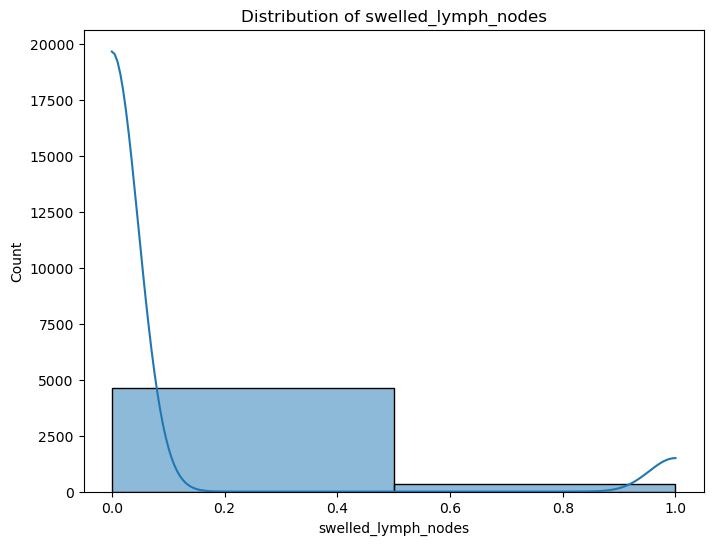

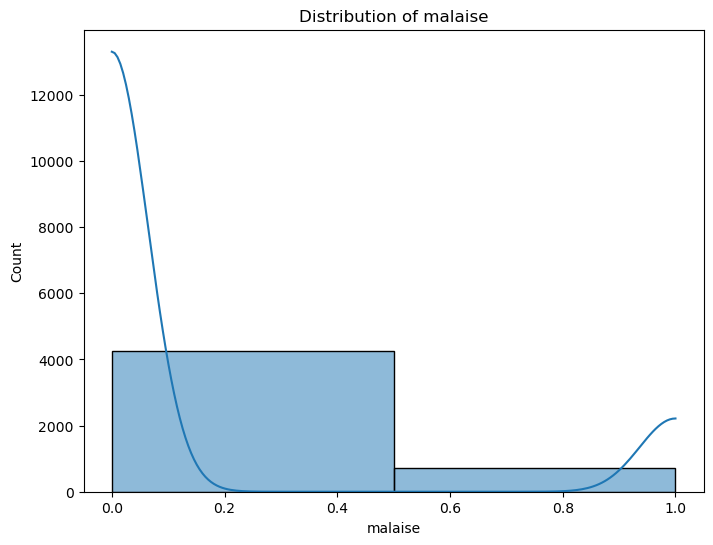

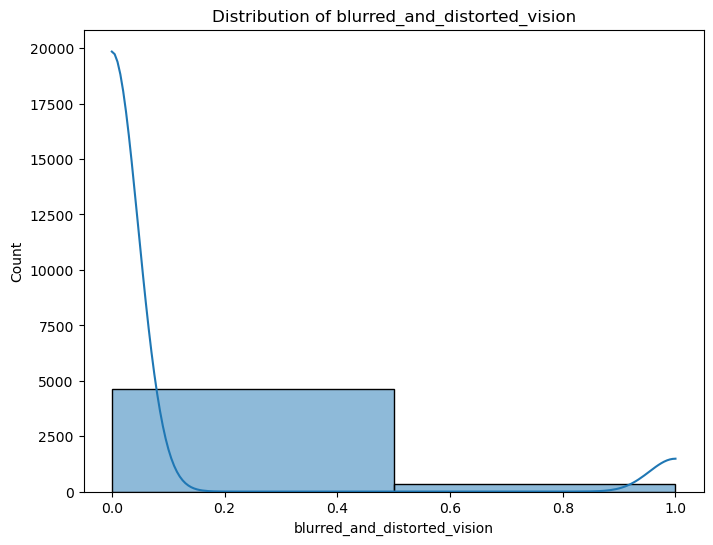

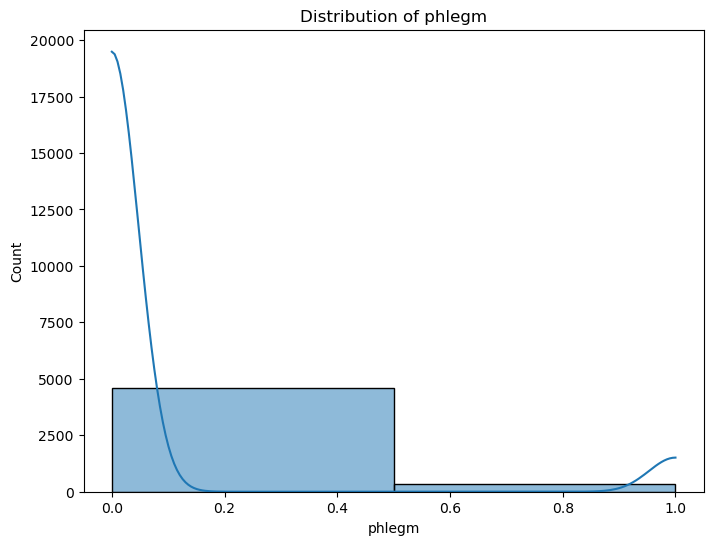

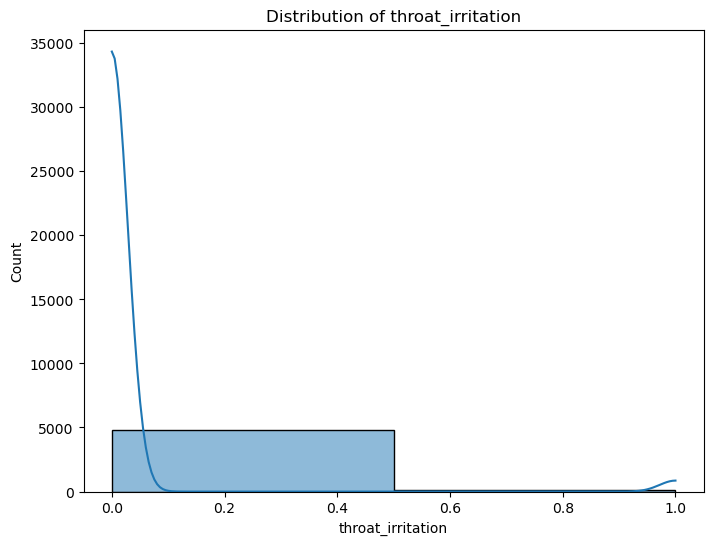

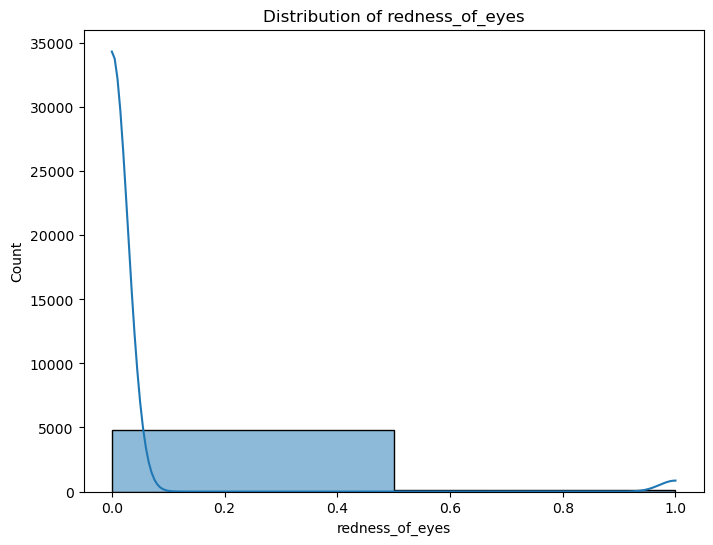

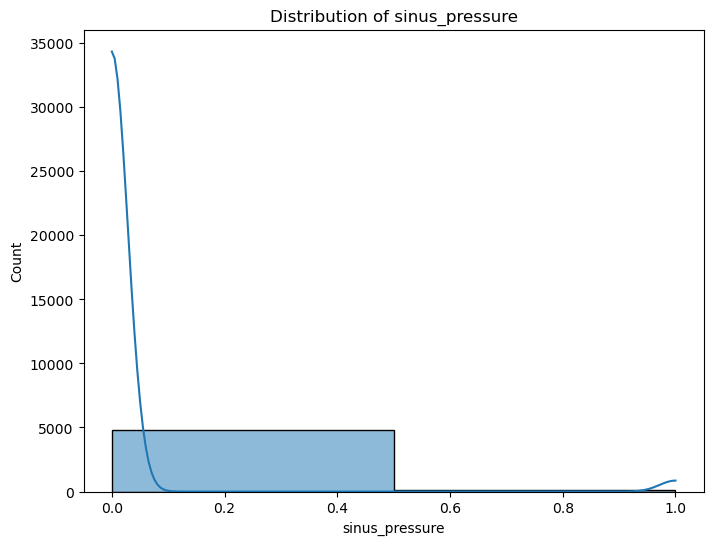

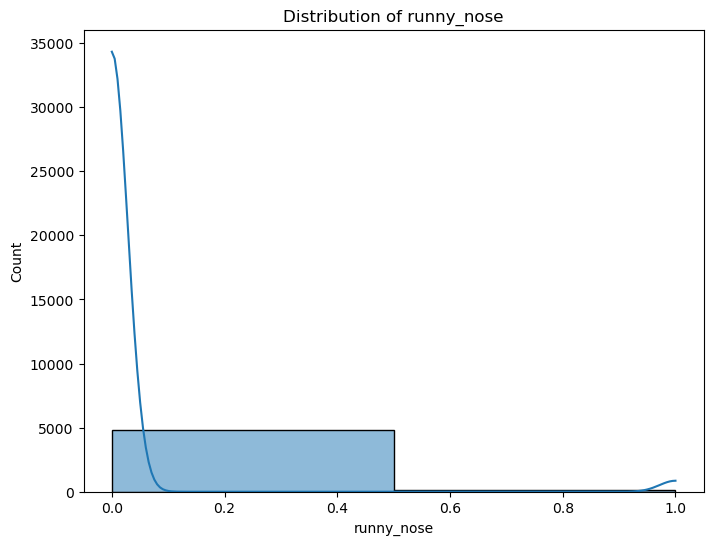

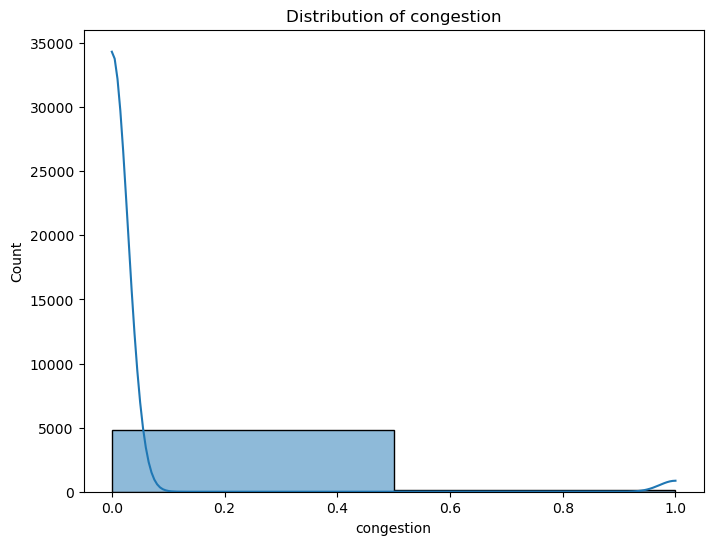

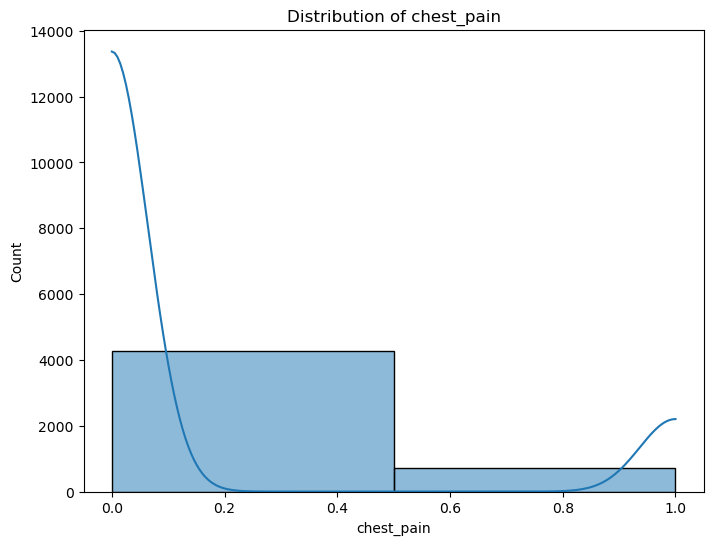

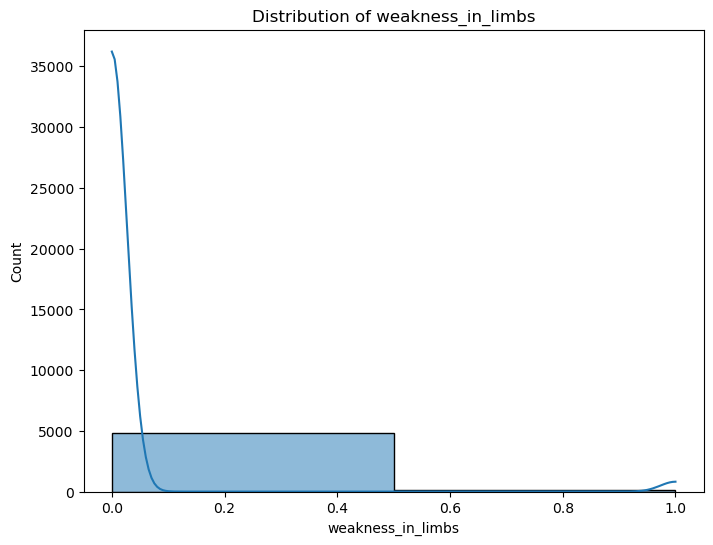

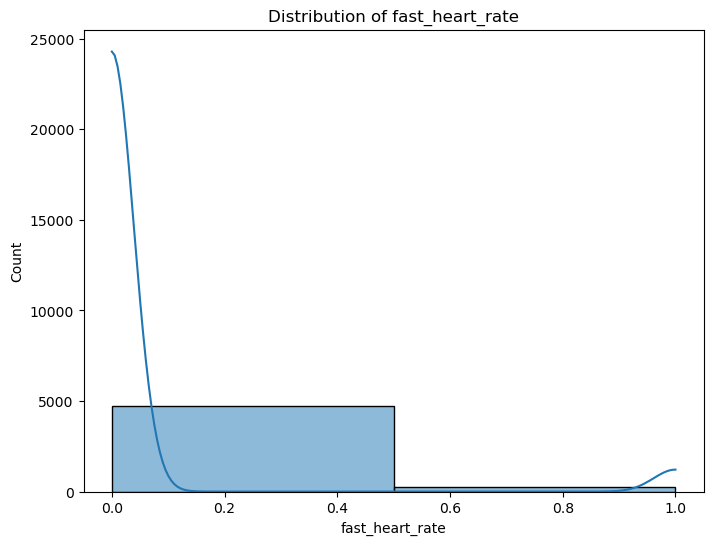

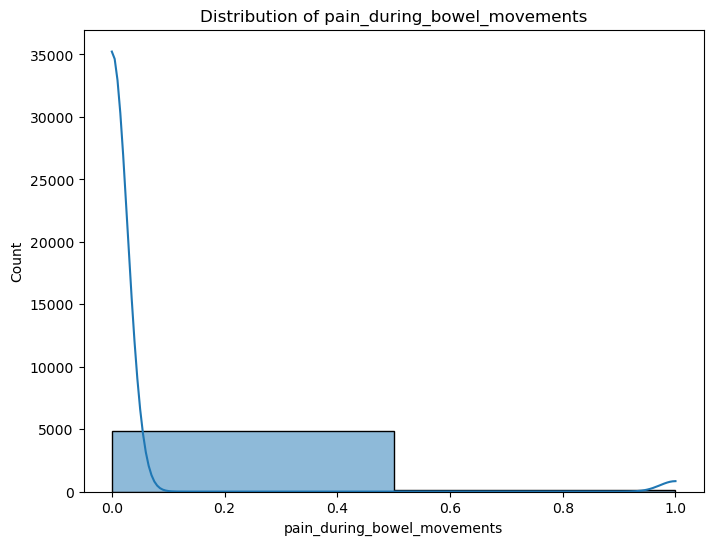

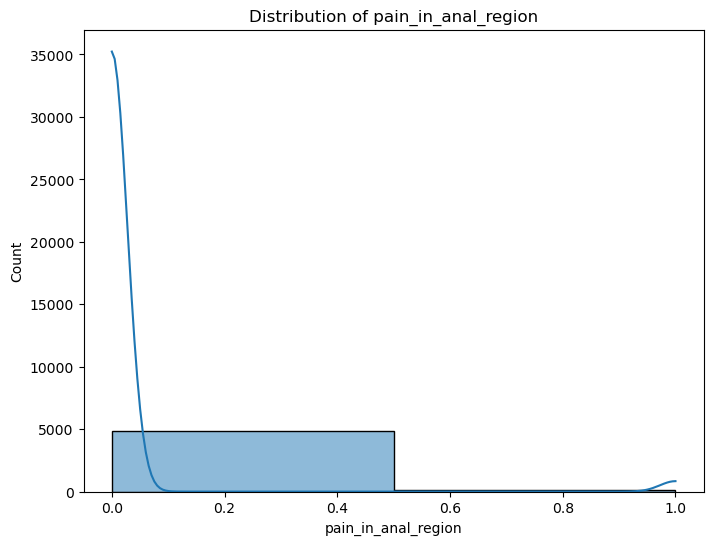

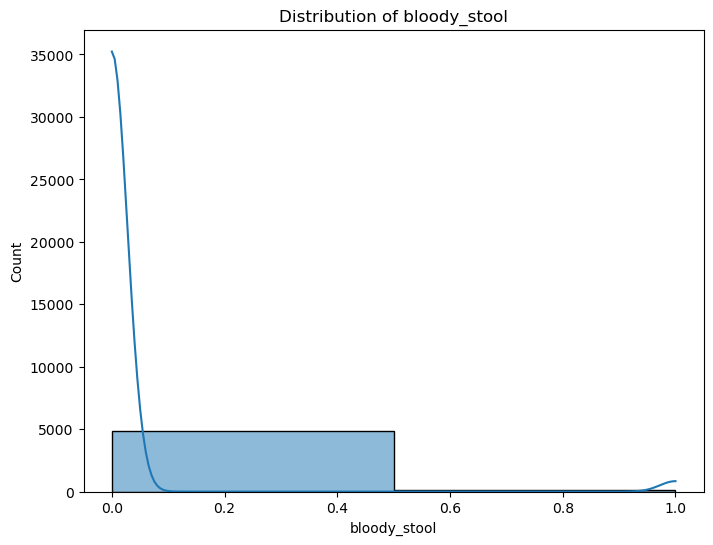

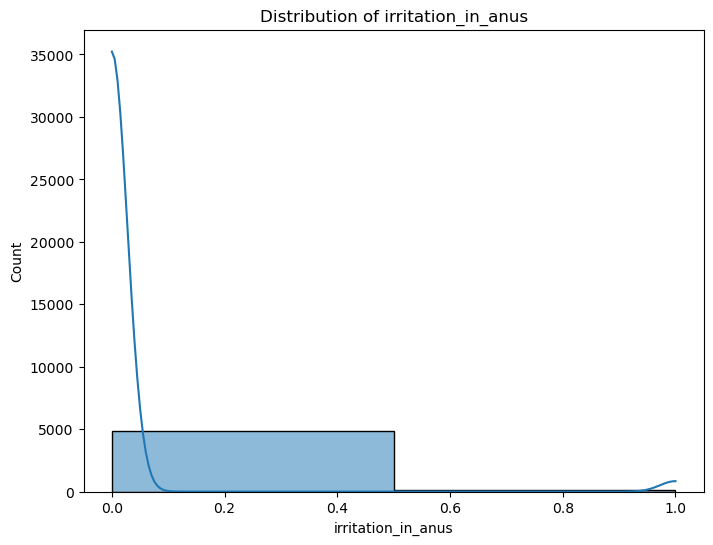

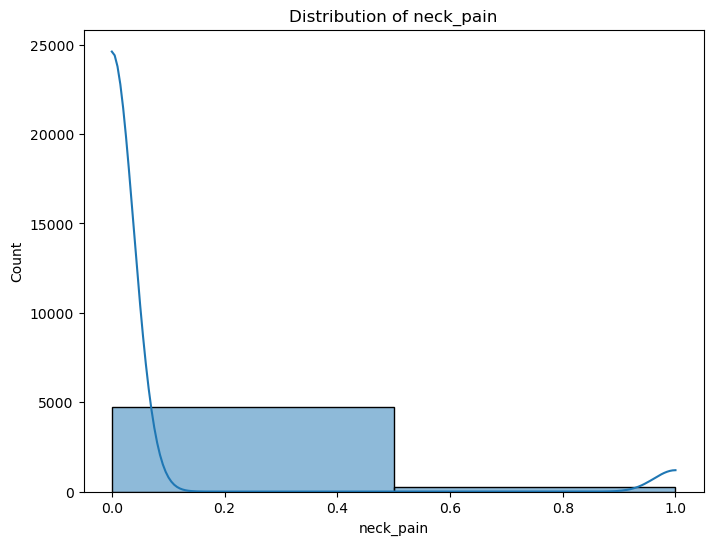

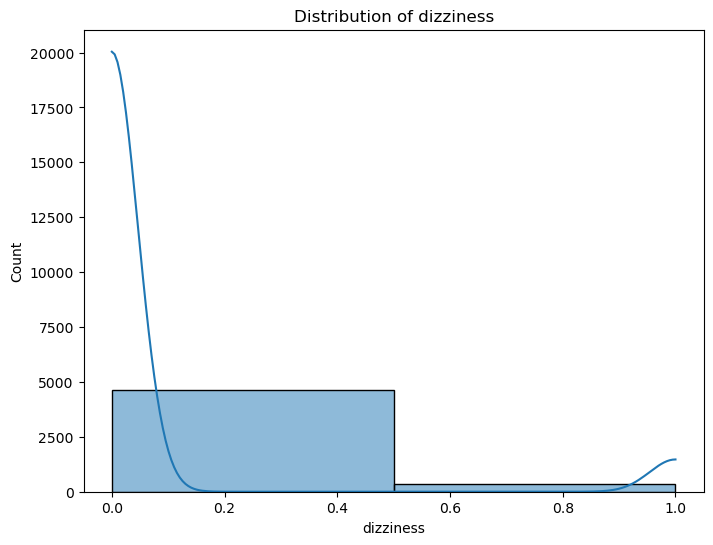

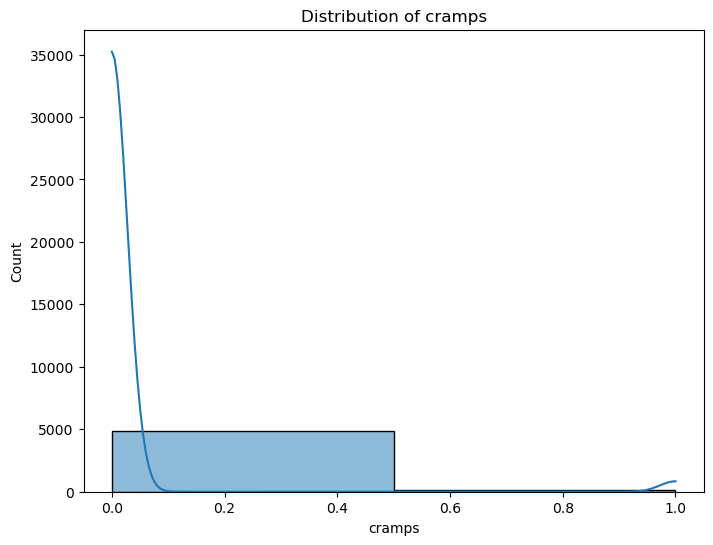

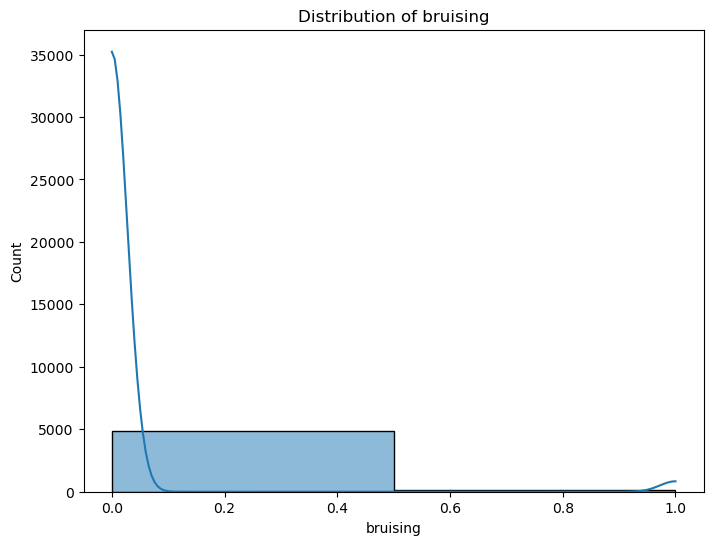

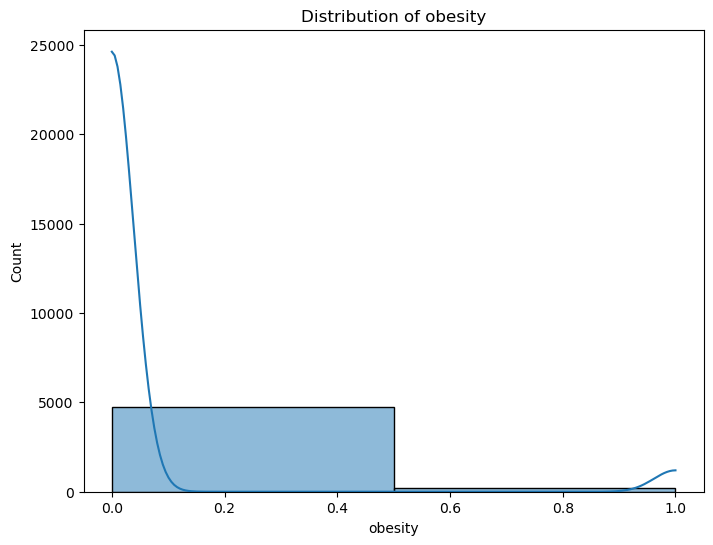

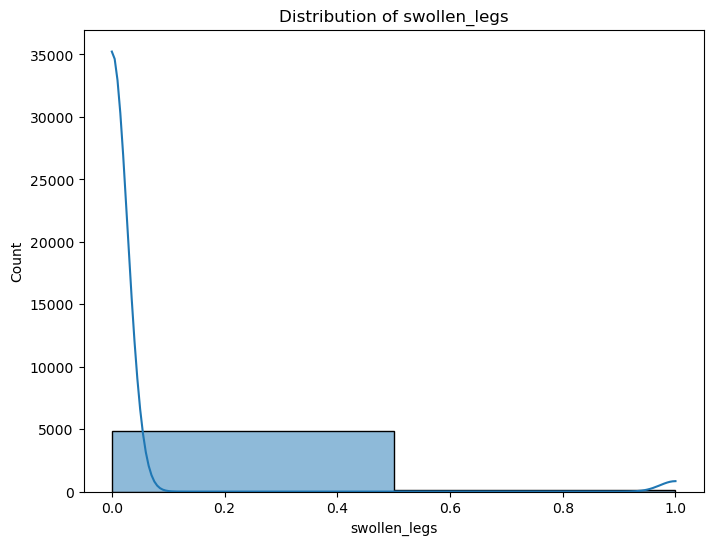

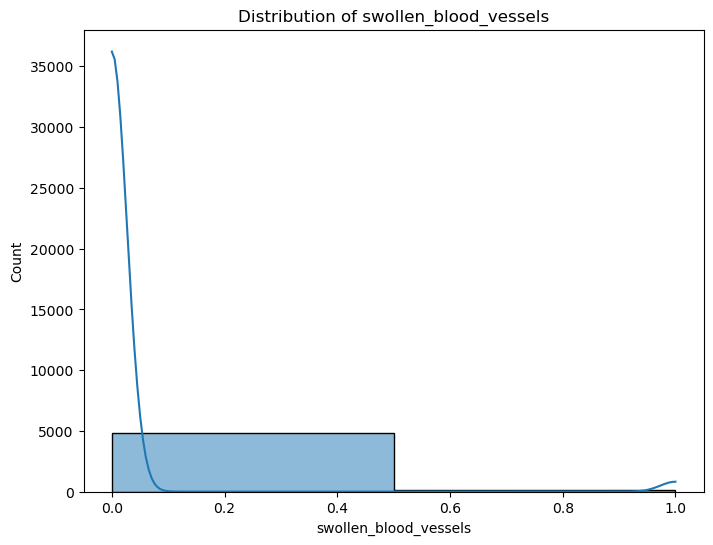

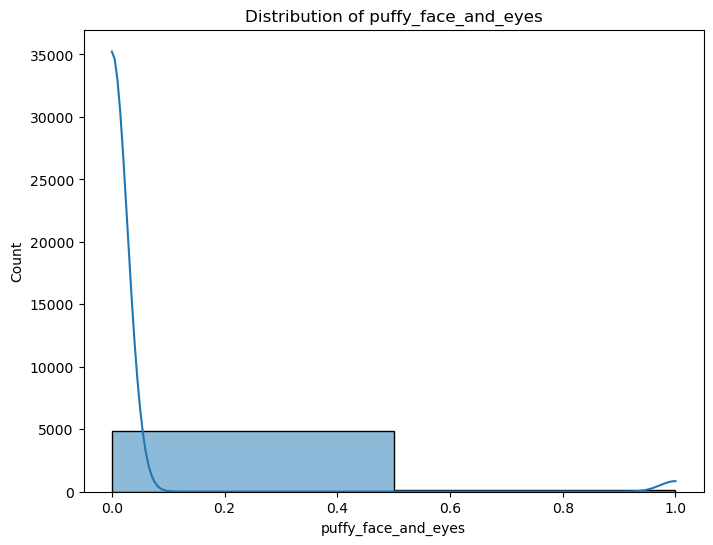

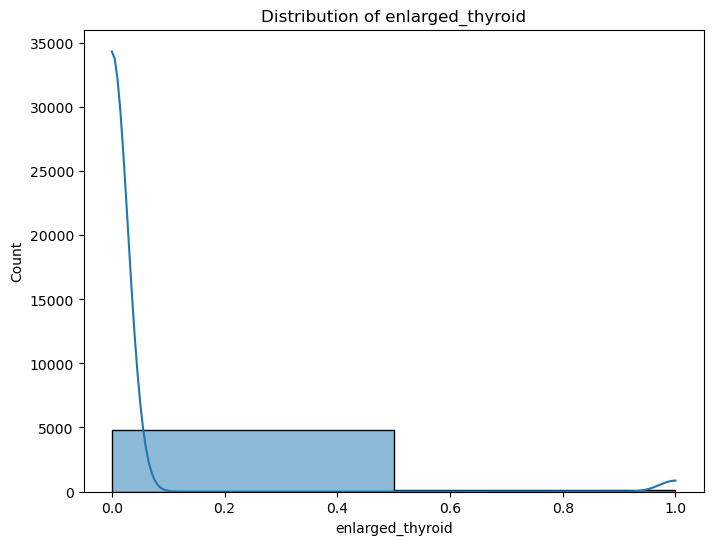

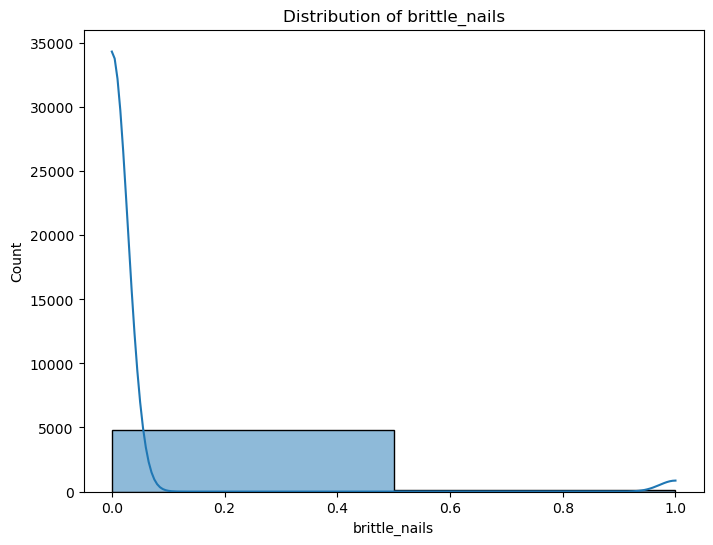

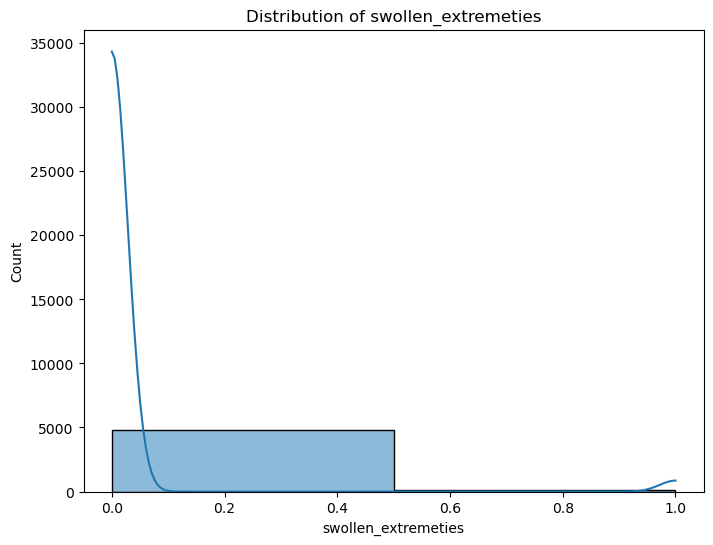

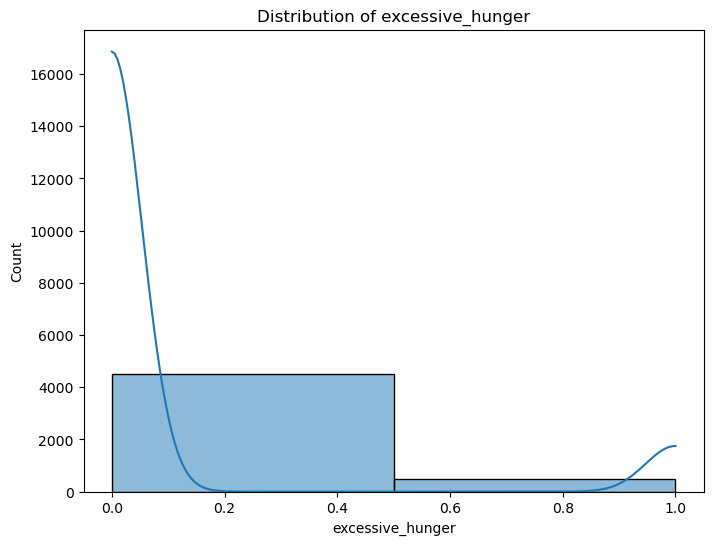

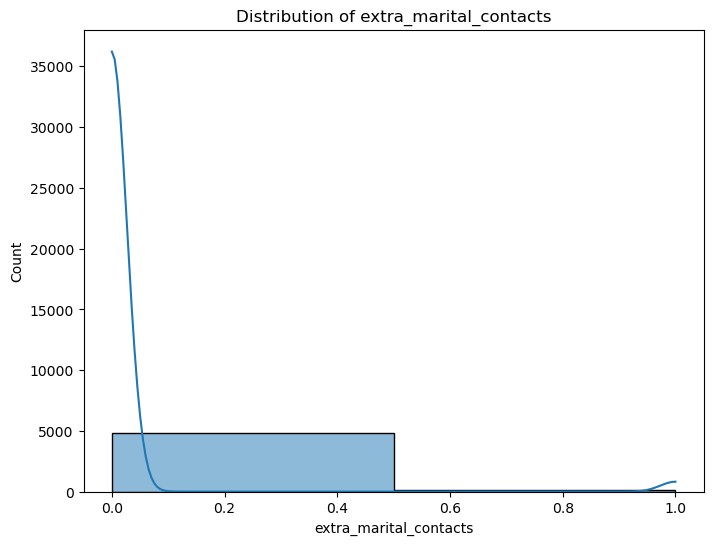

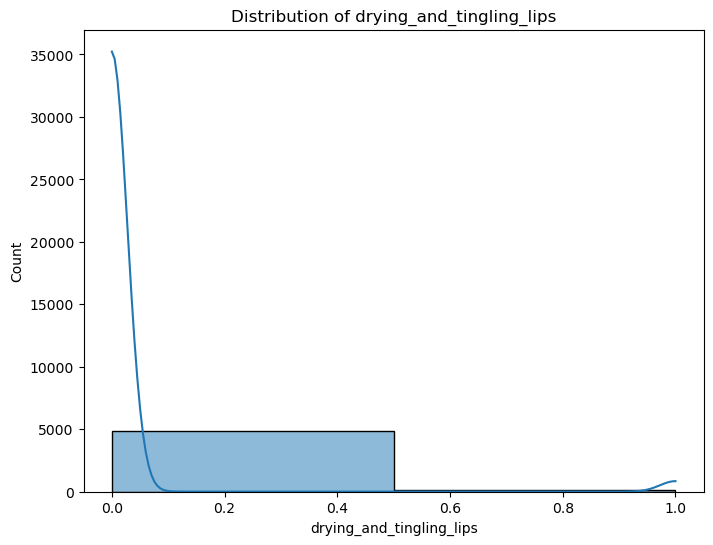

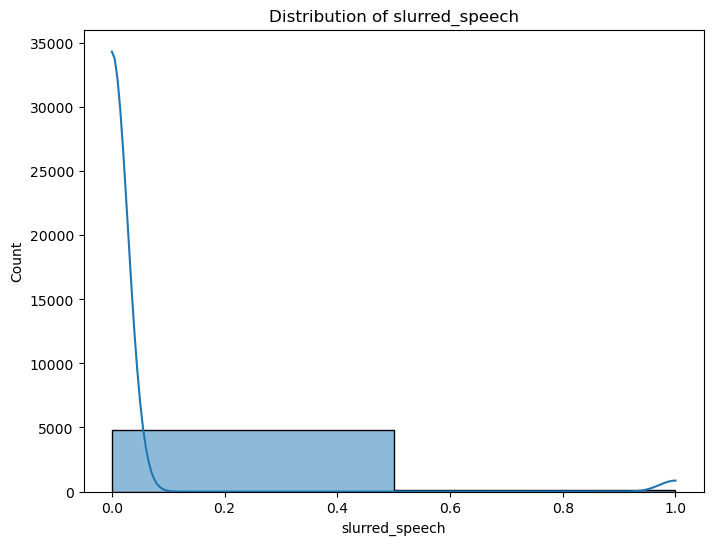

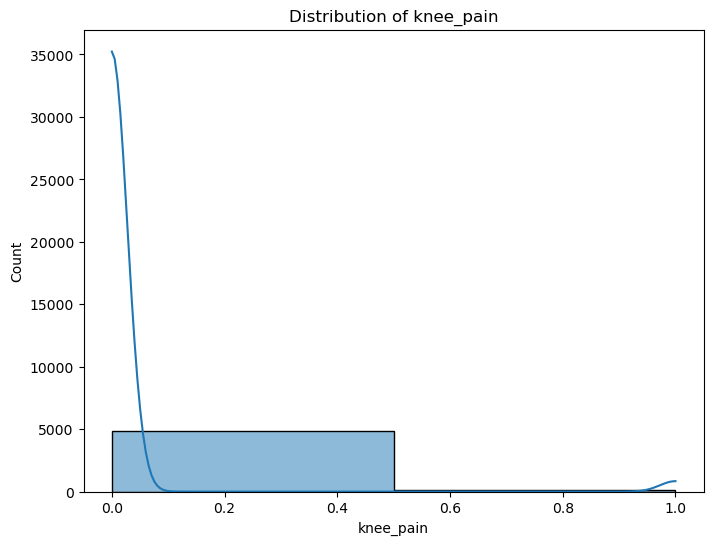

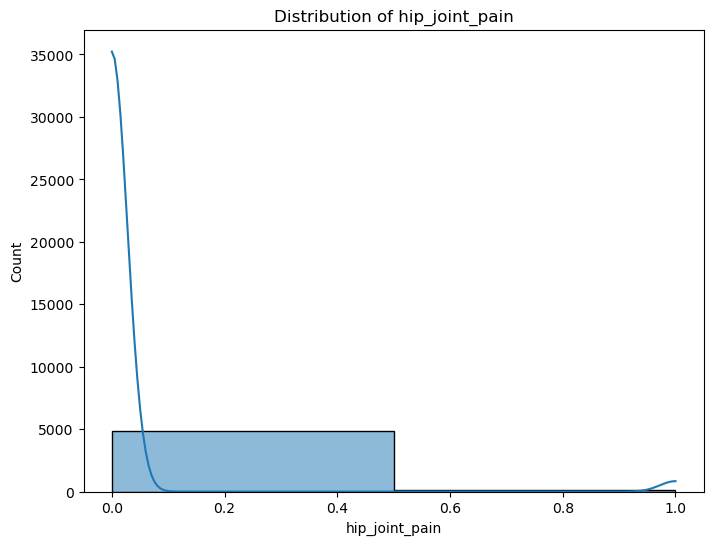

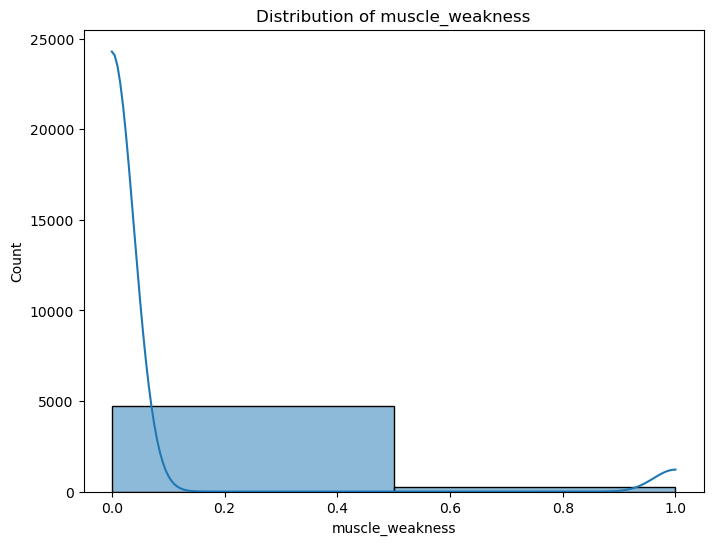

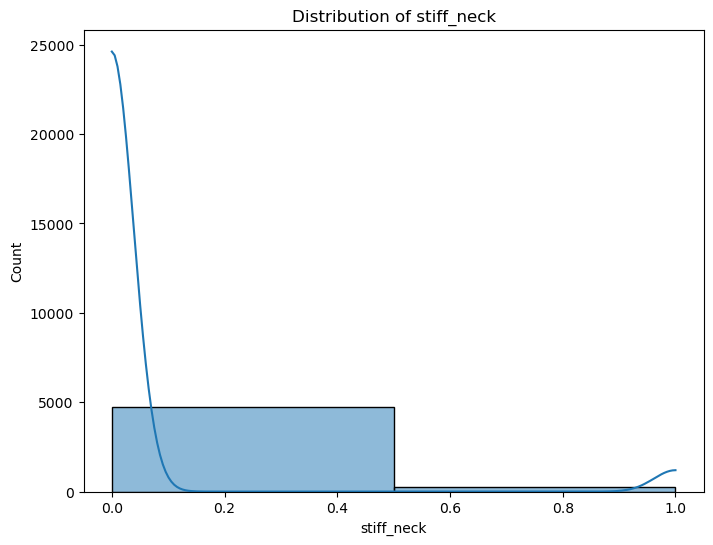

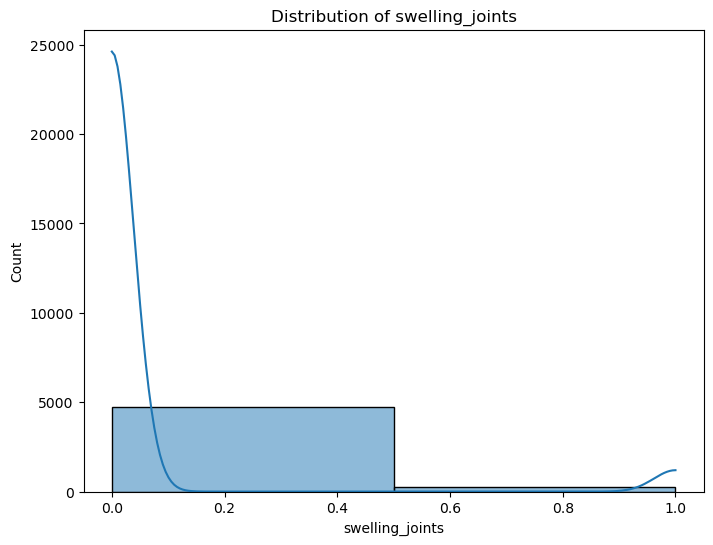

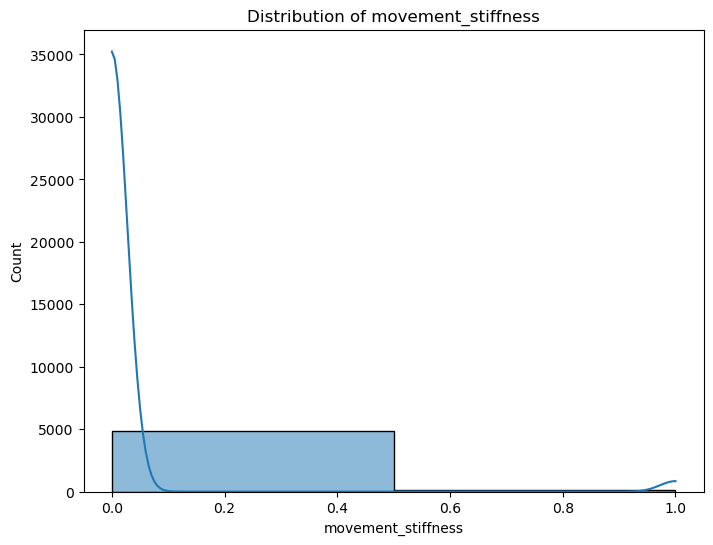

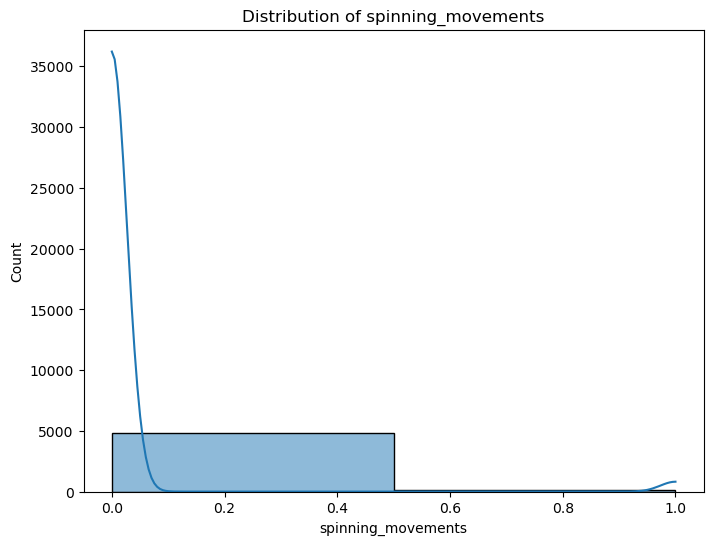

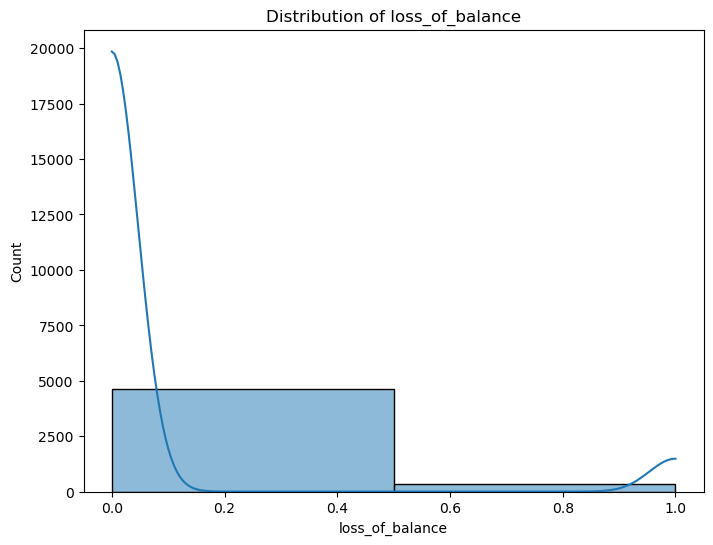

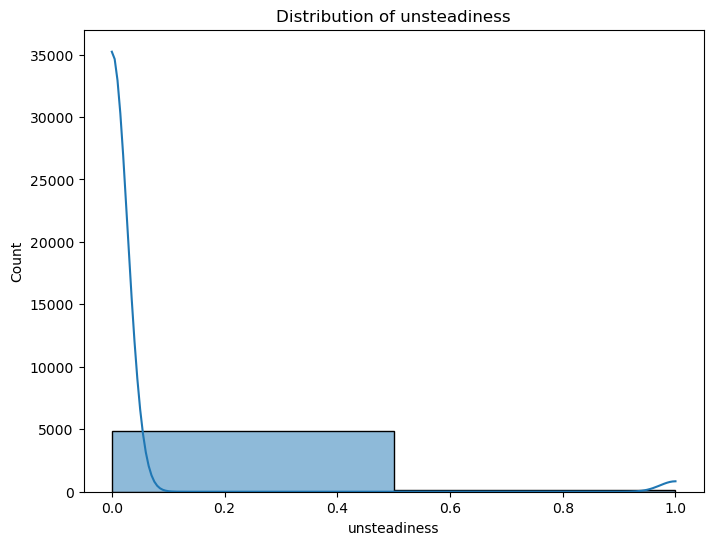

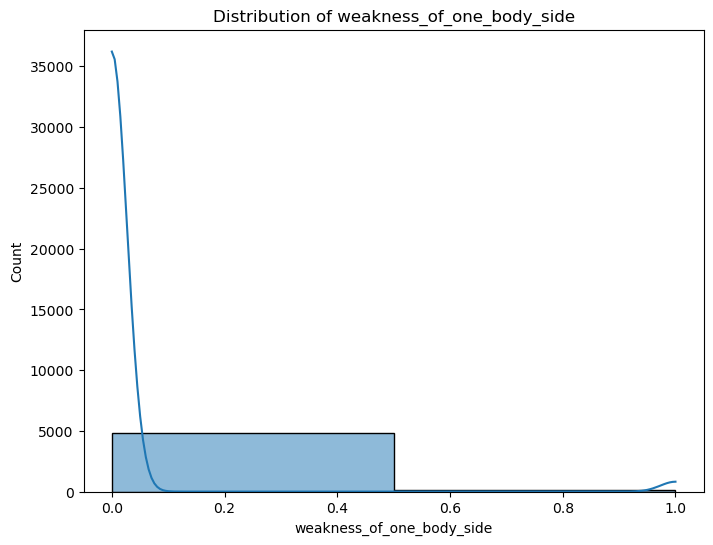

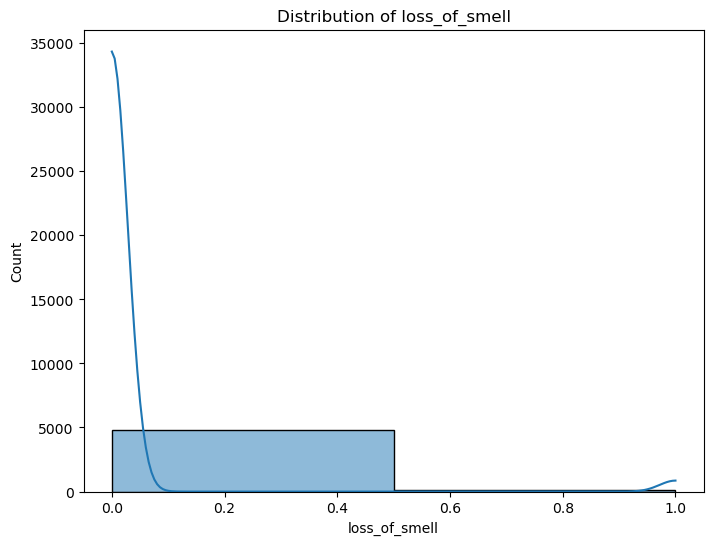

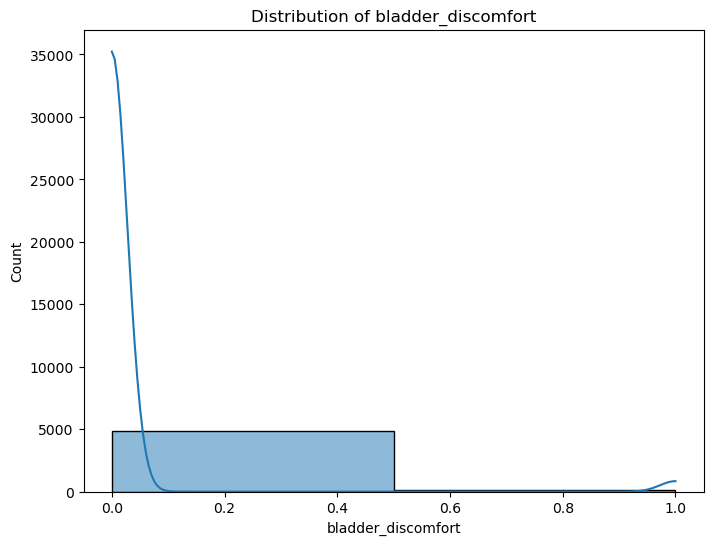

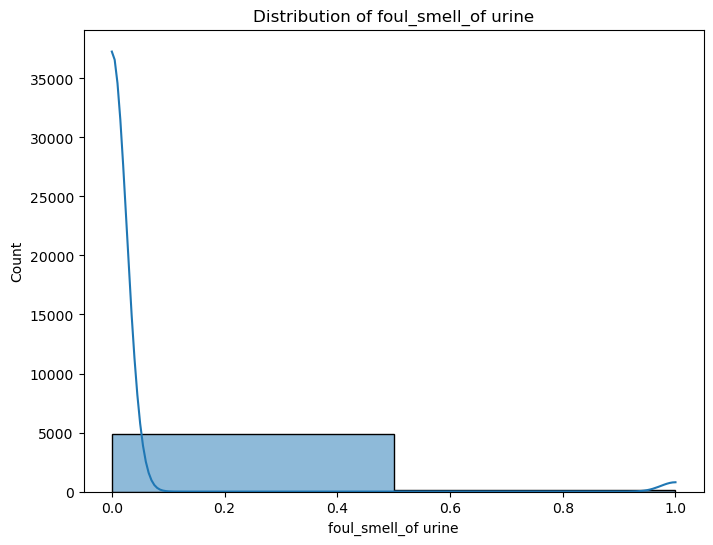

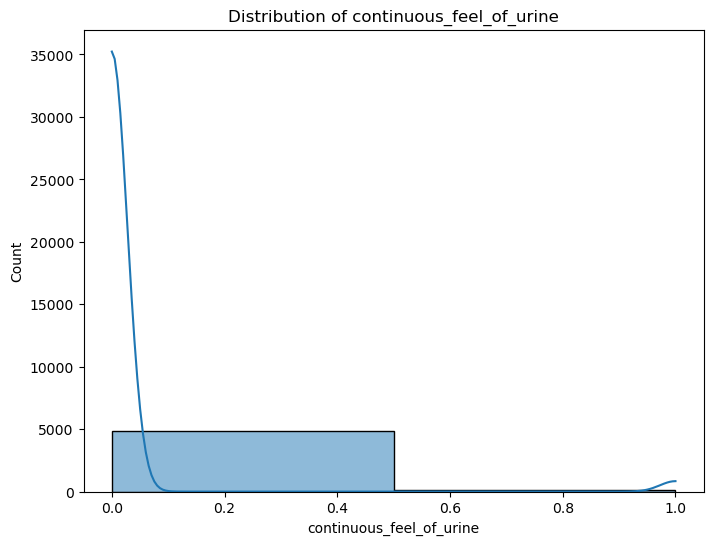

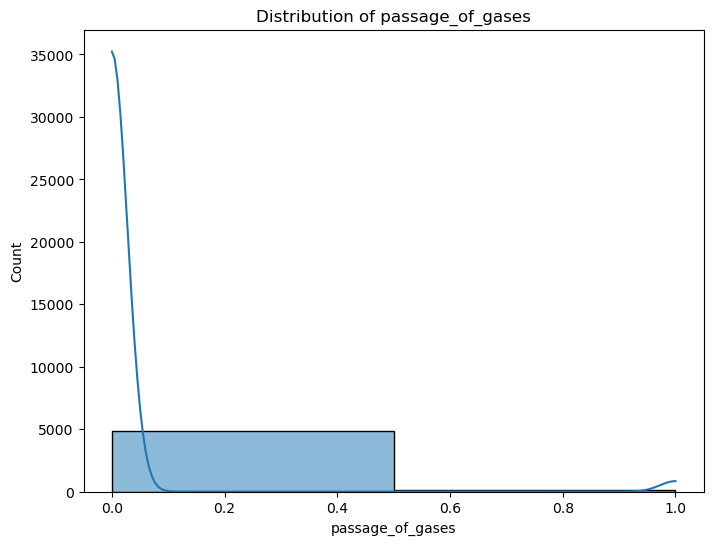

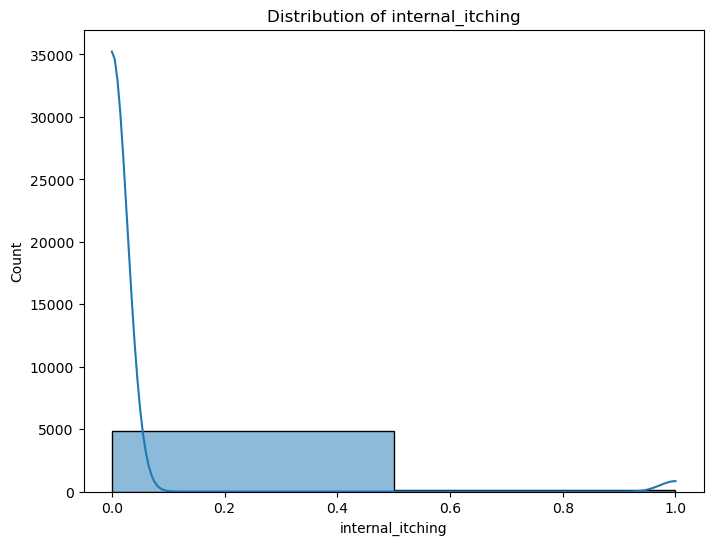

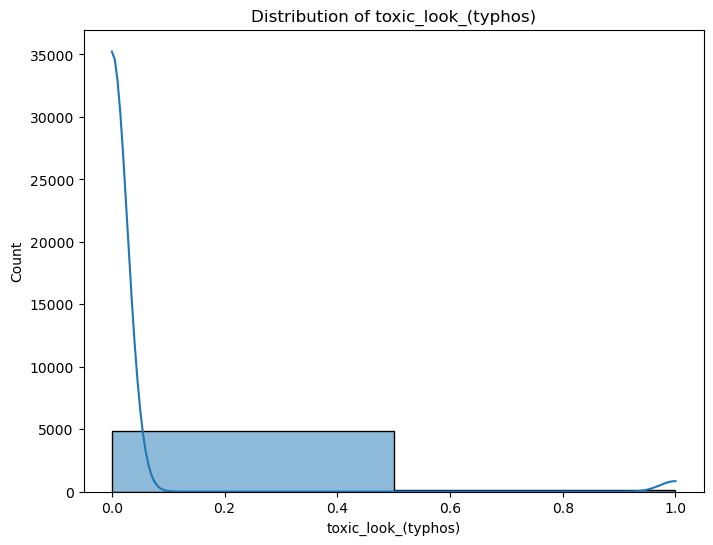

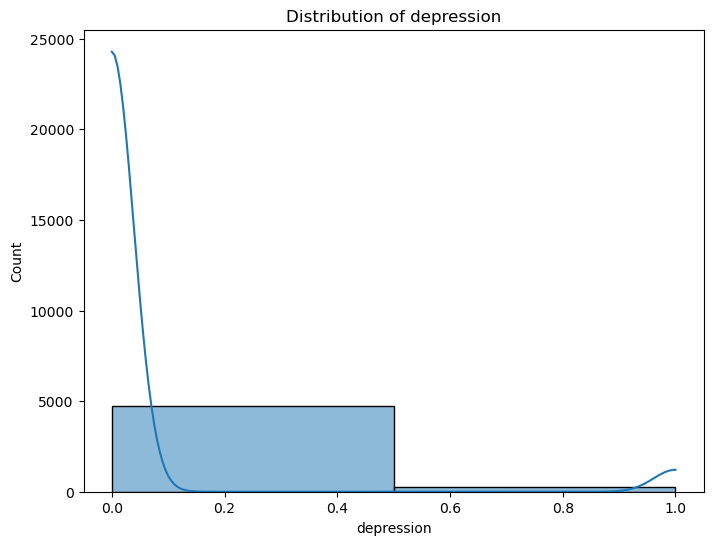

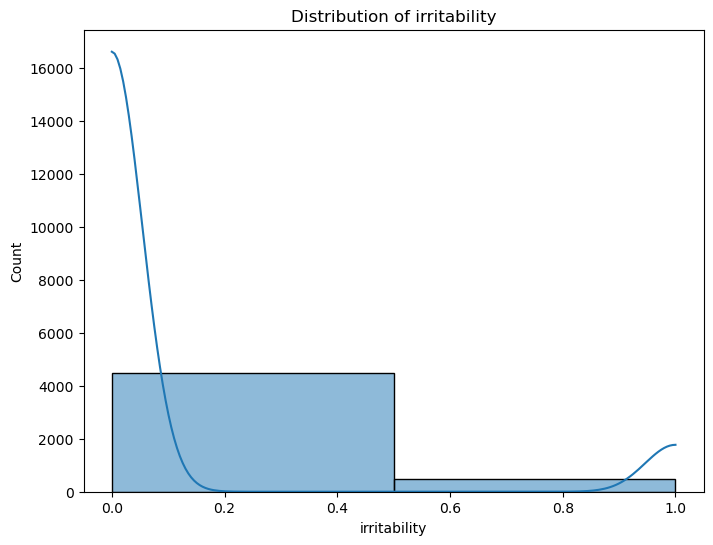

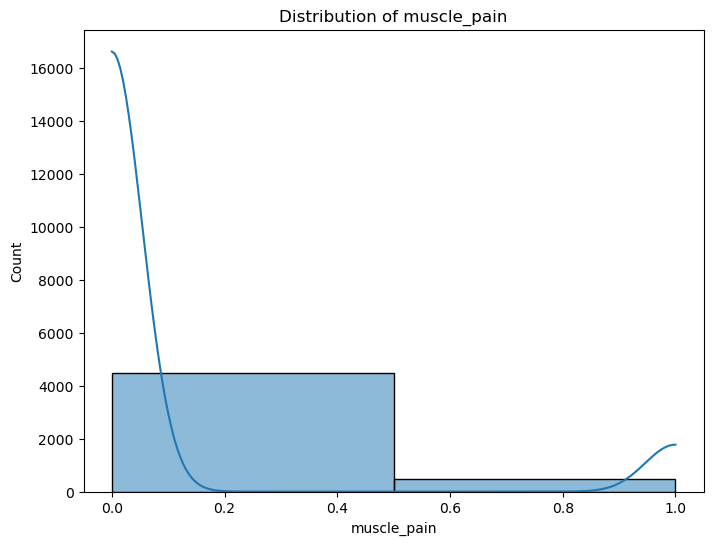

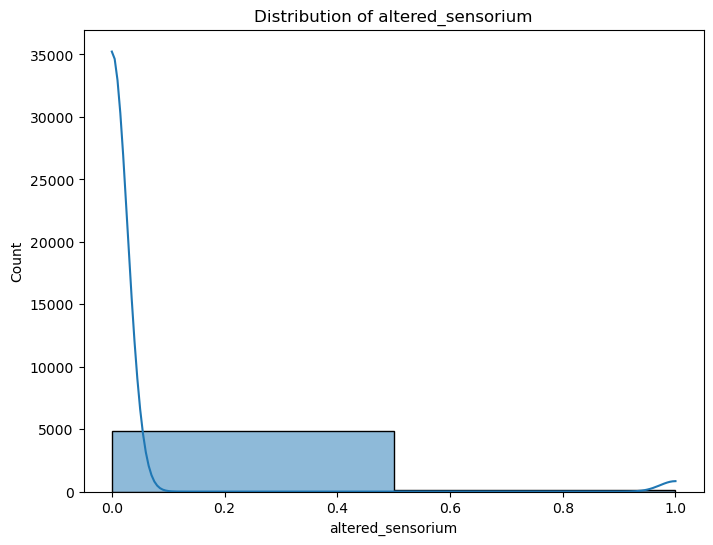

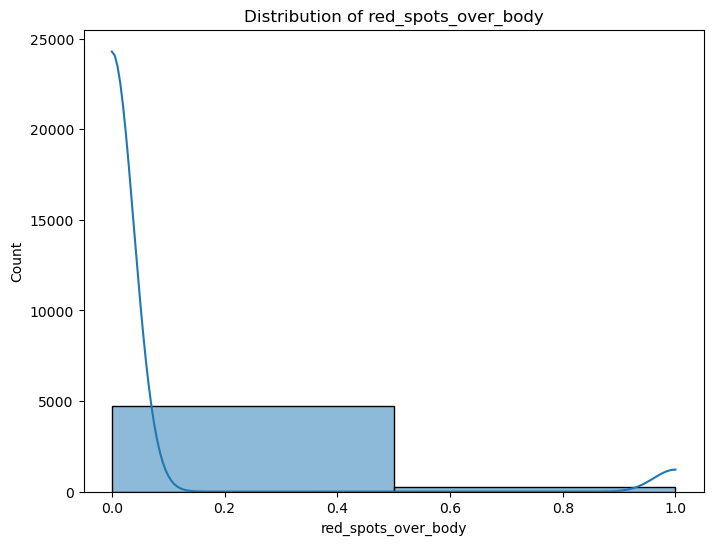

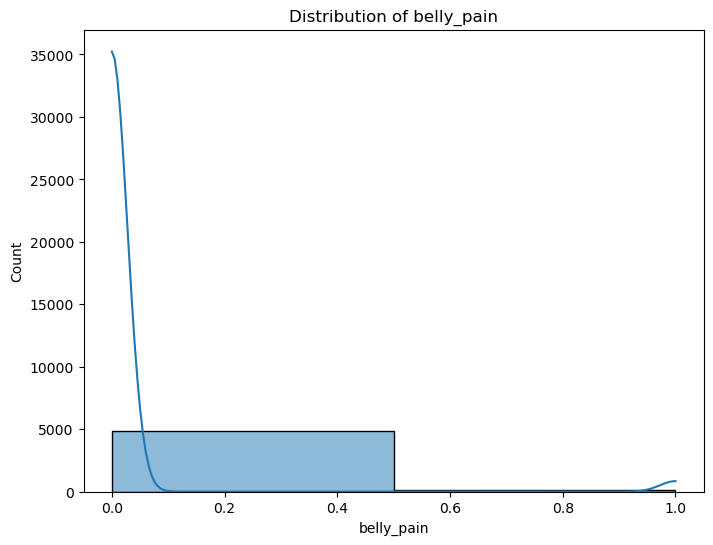

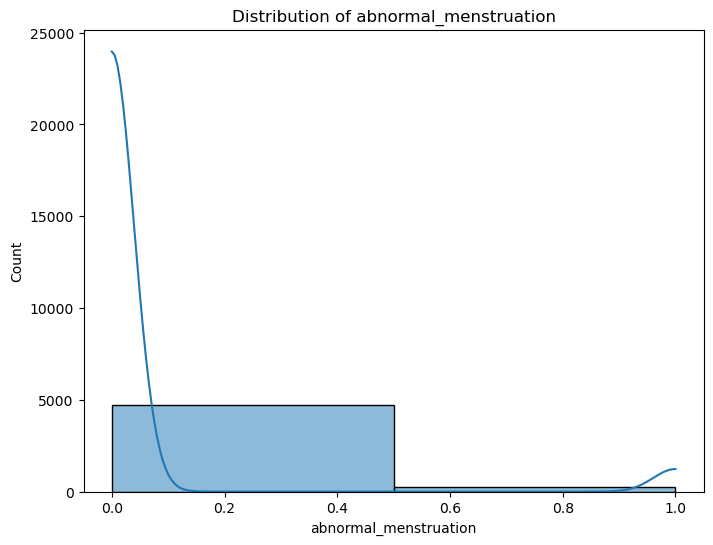

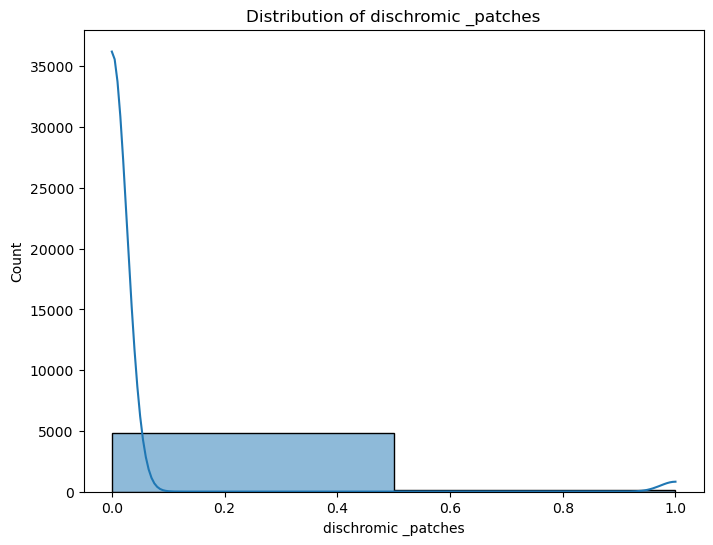

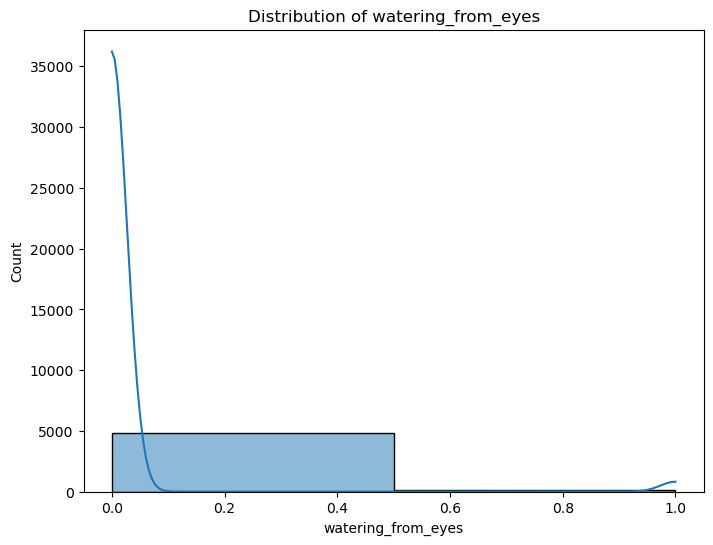

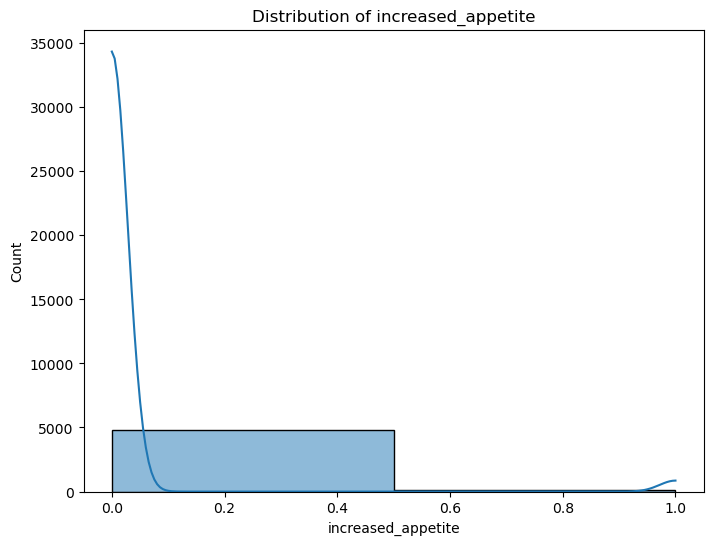

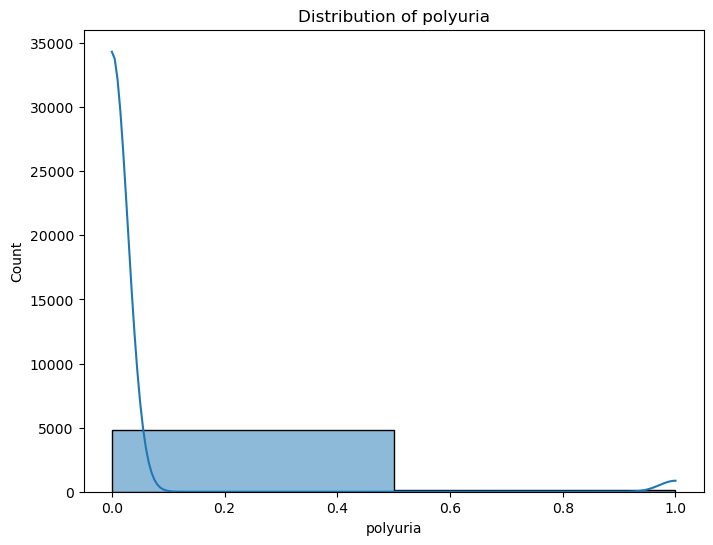

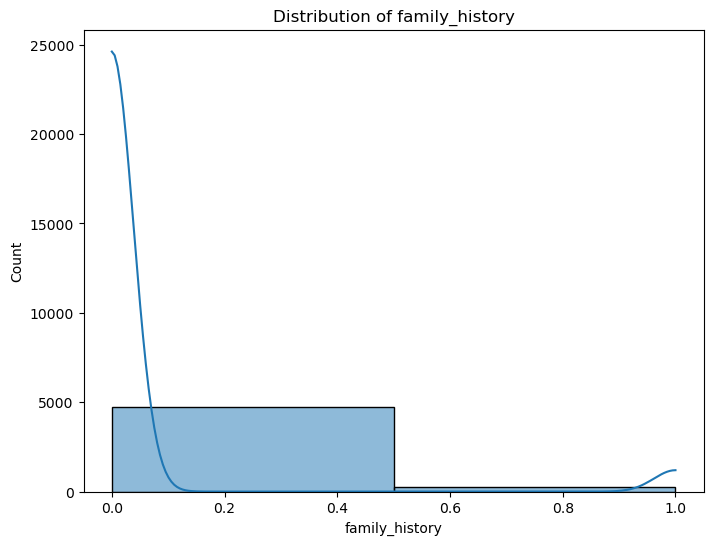

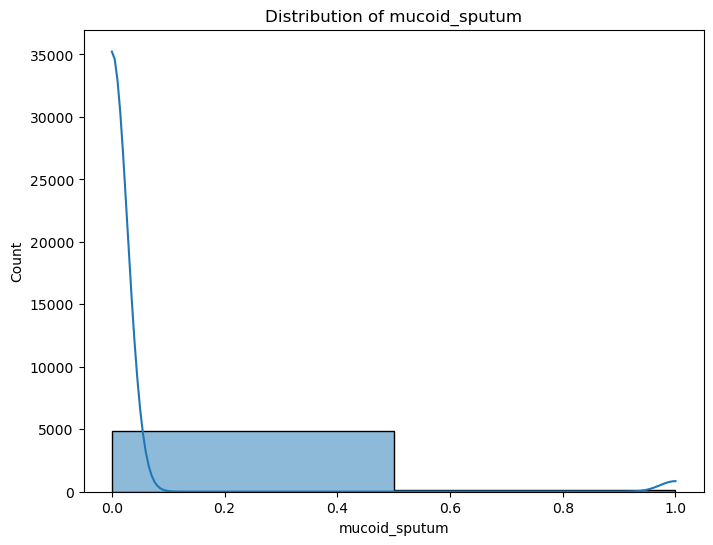

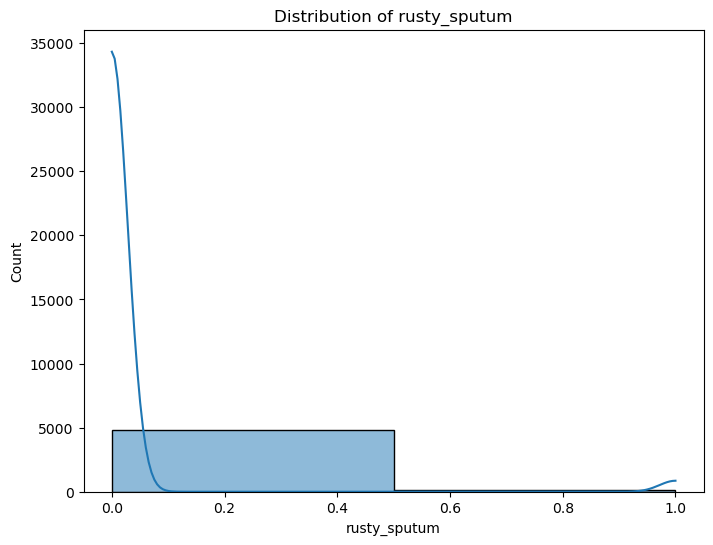

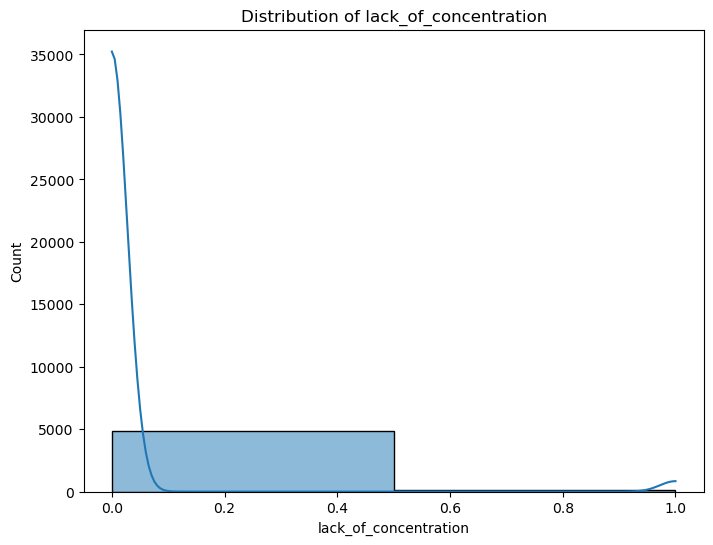

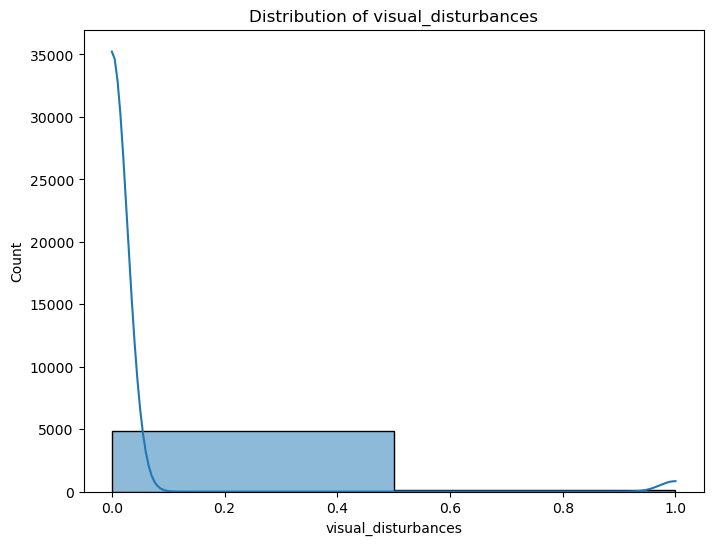

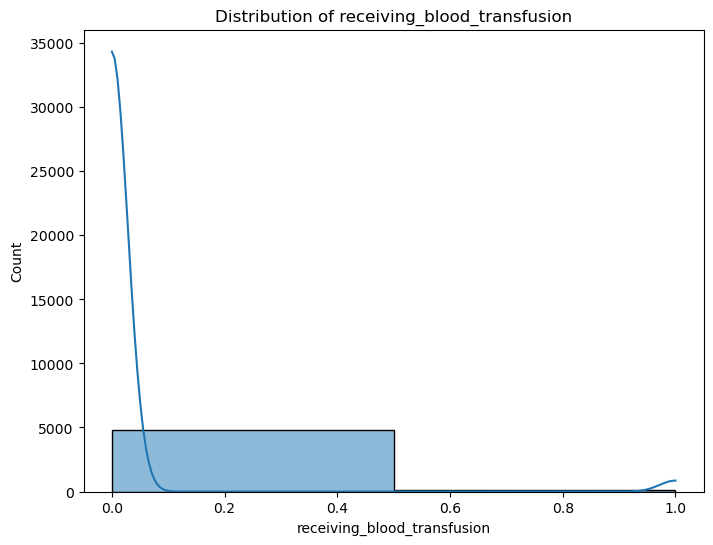

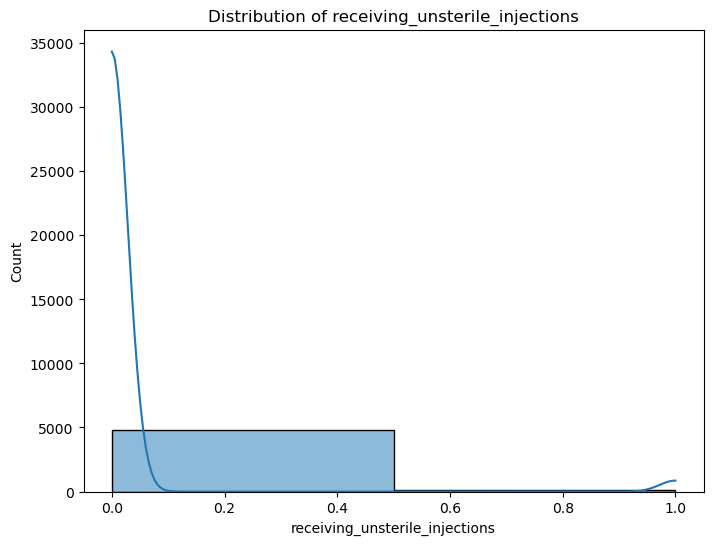

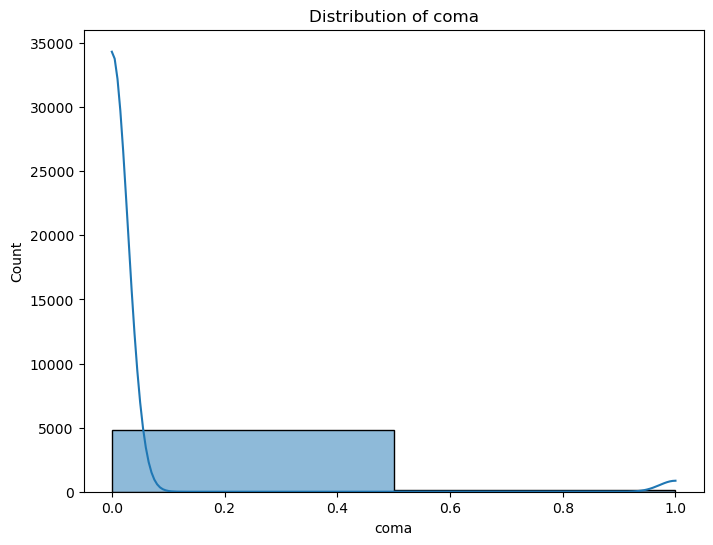

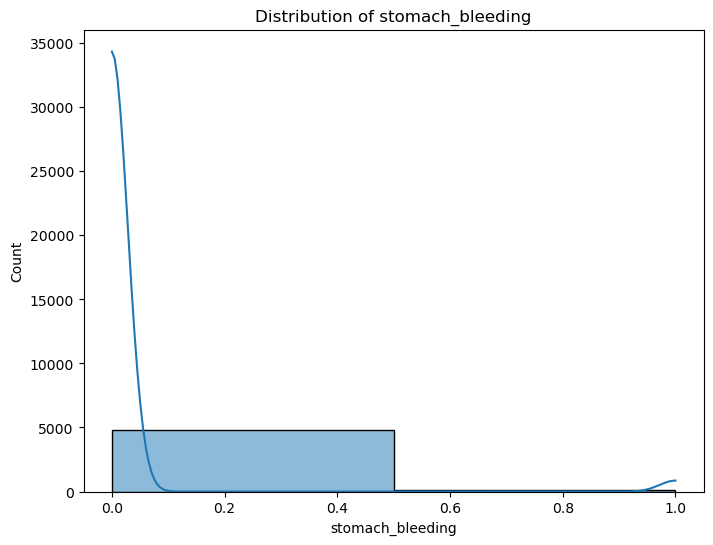

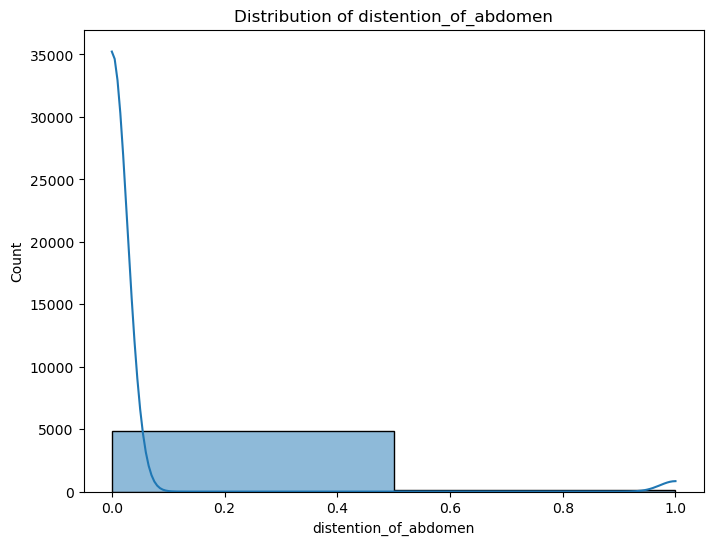

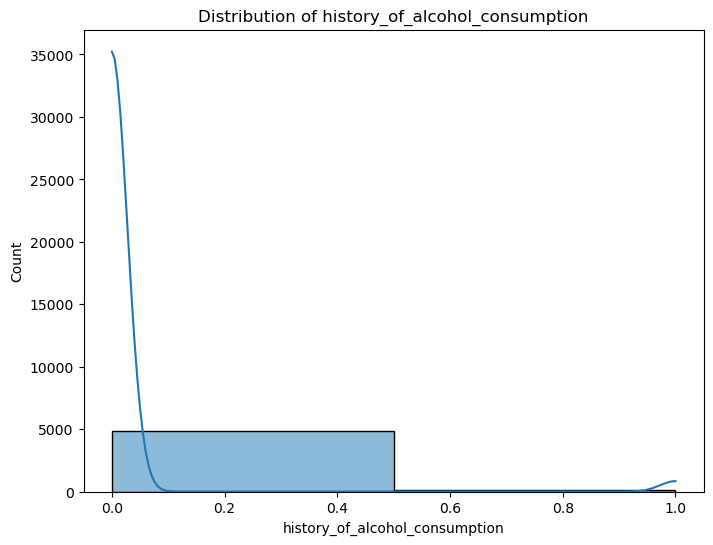

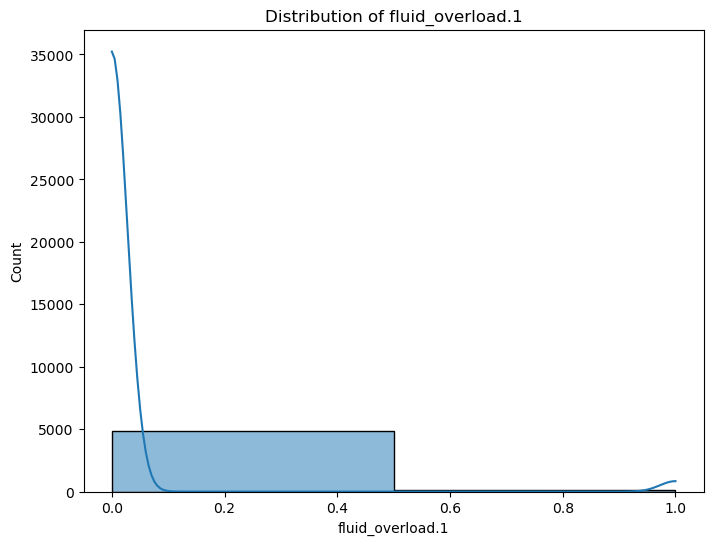

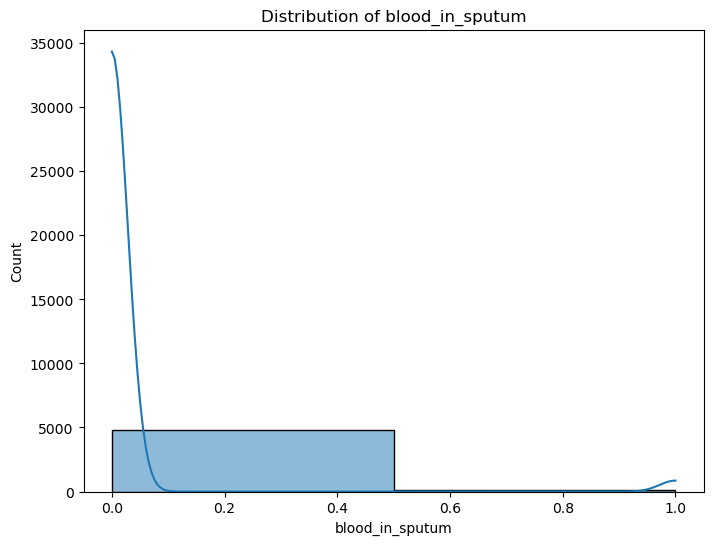

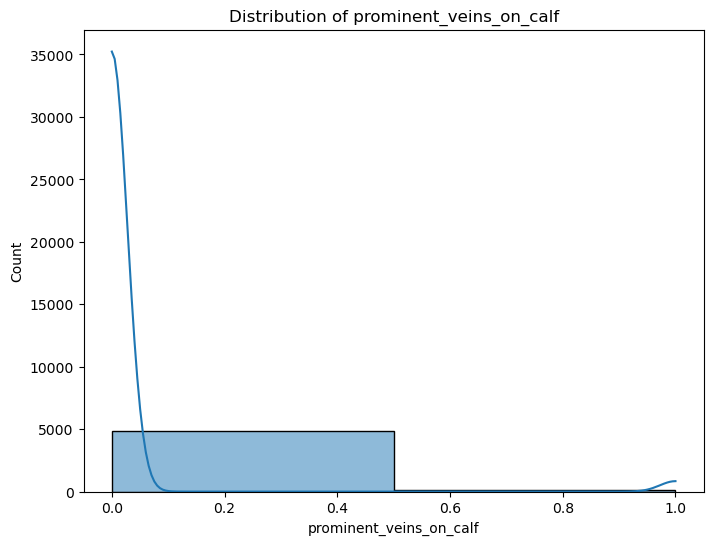

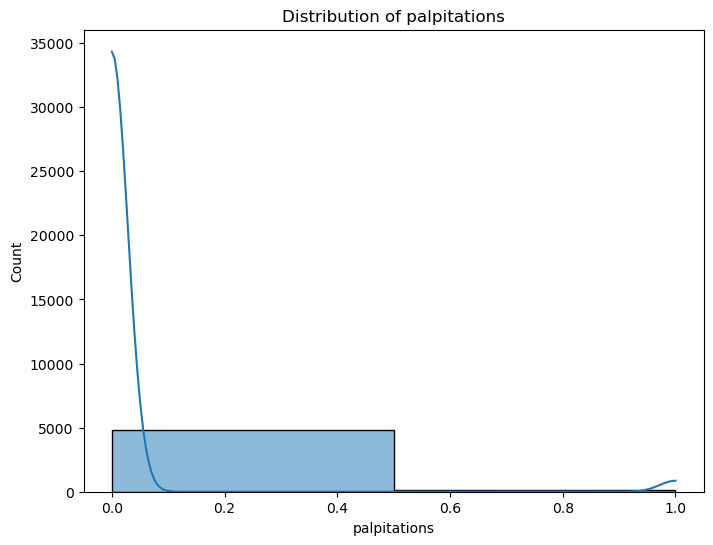

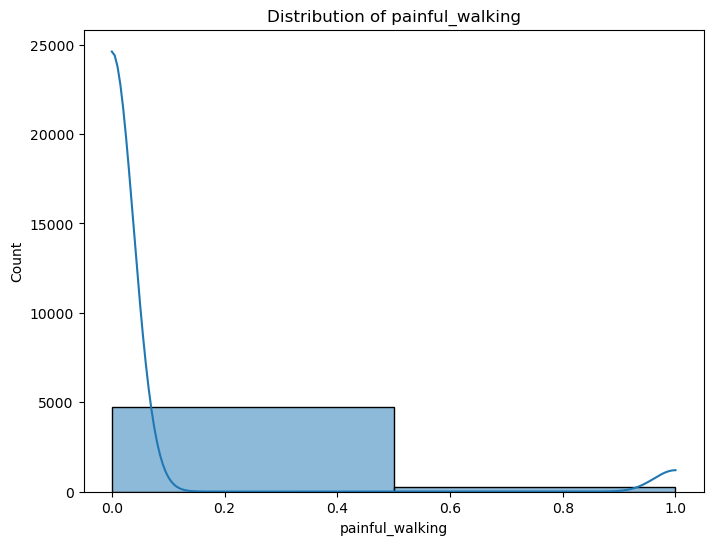

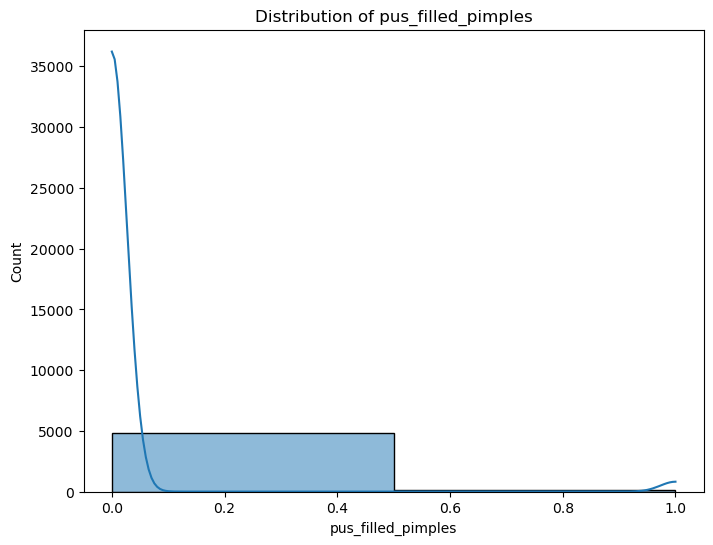

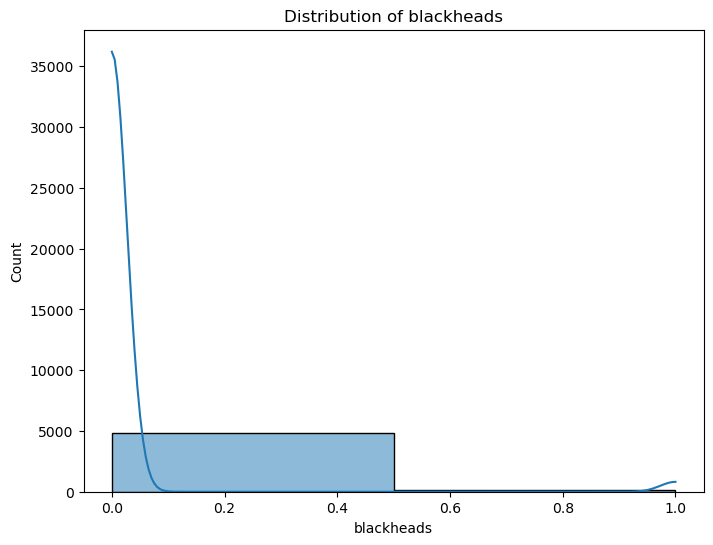

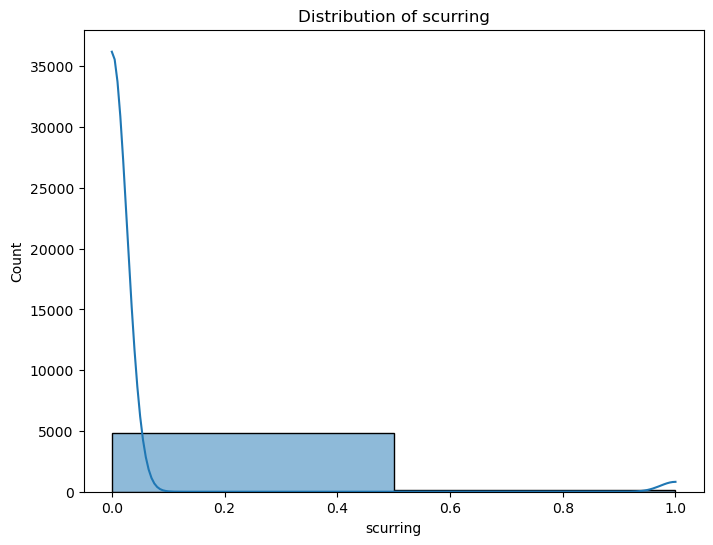

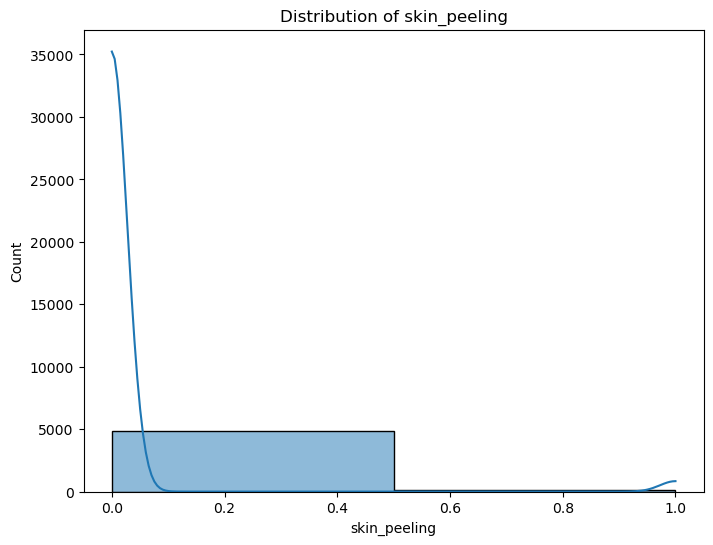

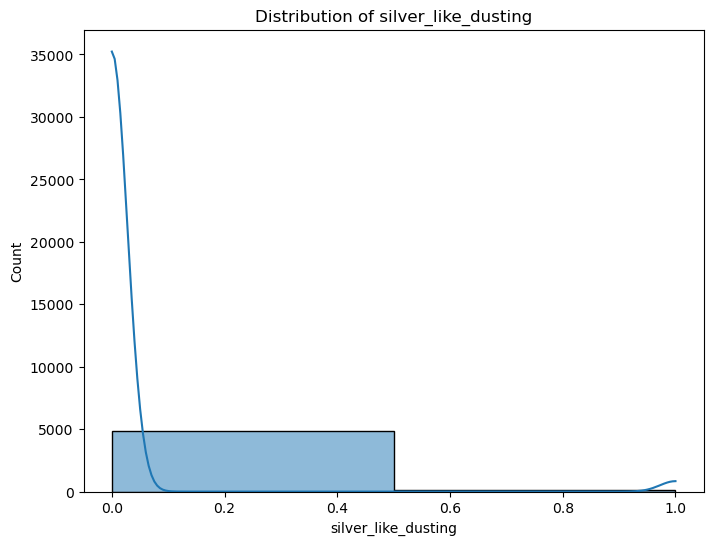

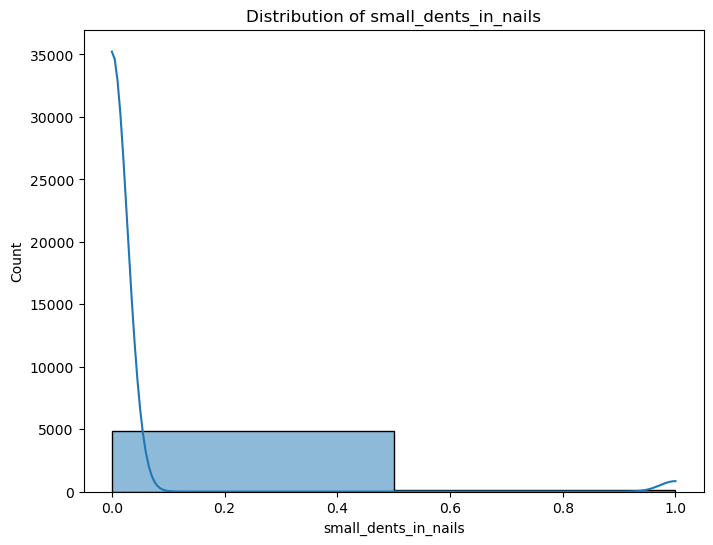

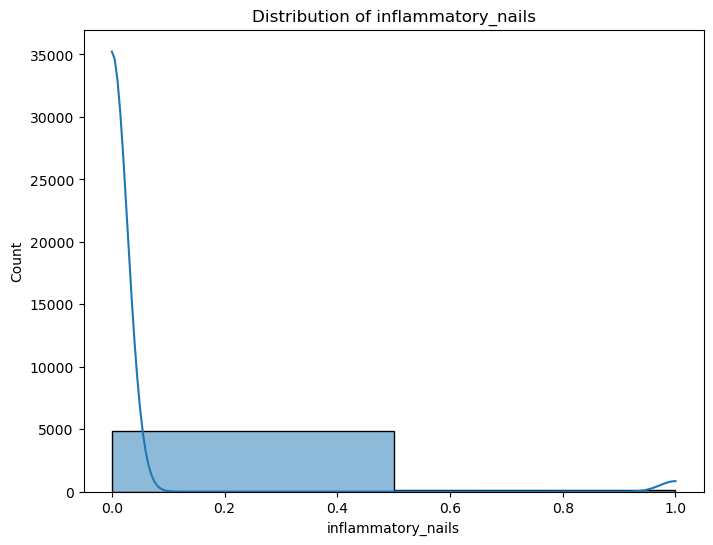

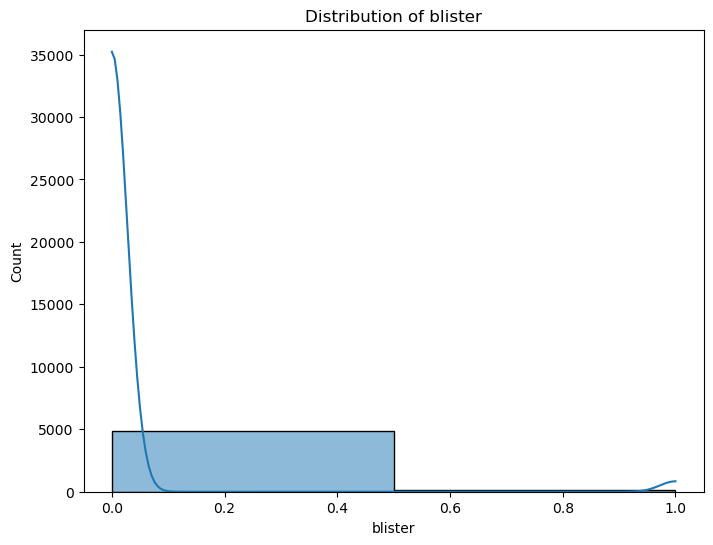

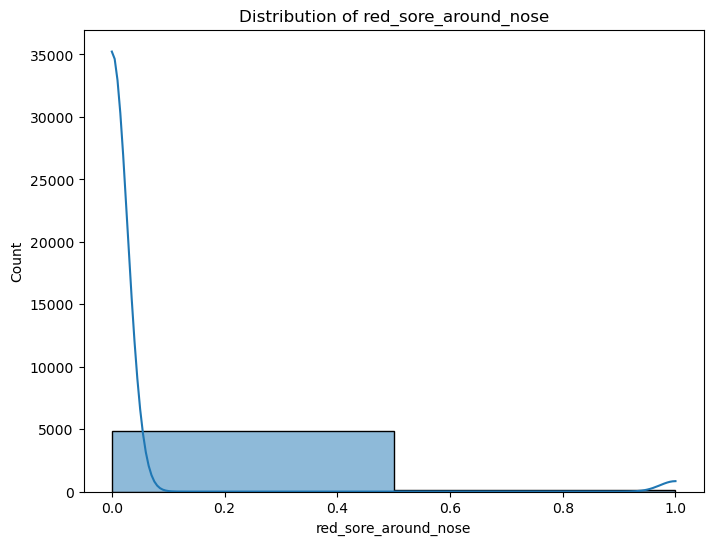

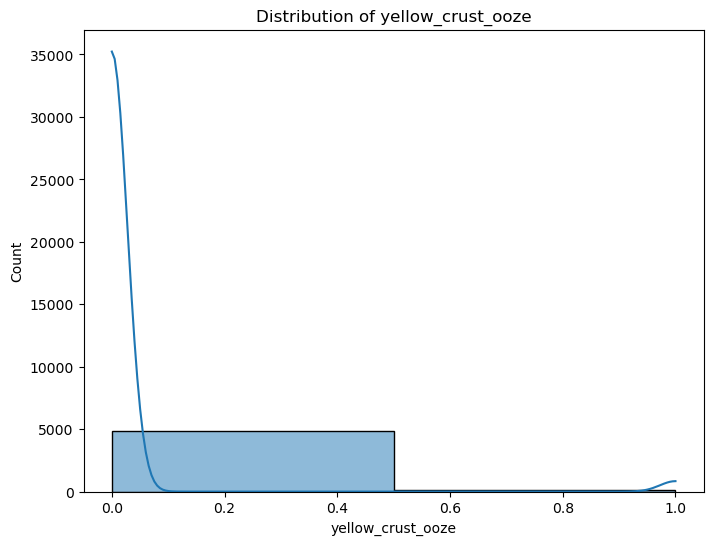

In [127]:
# Plot histograms for each symptom
for symptom in X.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[symptom], bins=2, kde=True)
    plt.title(f'Distribution of {symptom}')
    plt.show()


In [131]:
# Calculate the frequency of each symptom
symptom_frequencies = data.iloc[:, :-1].sum()

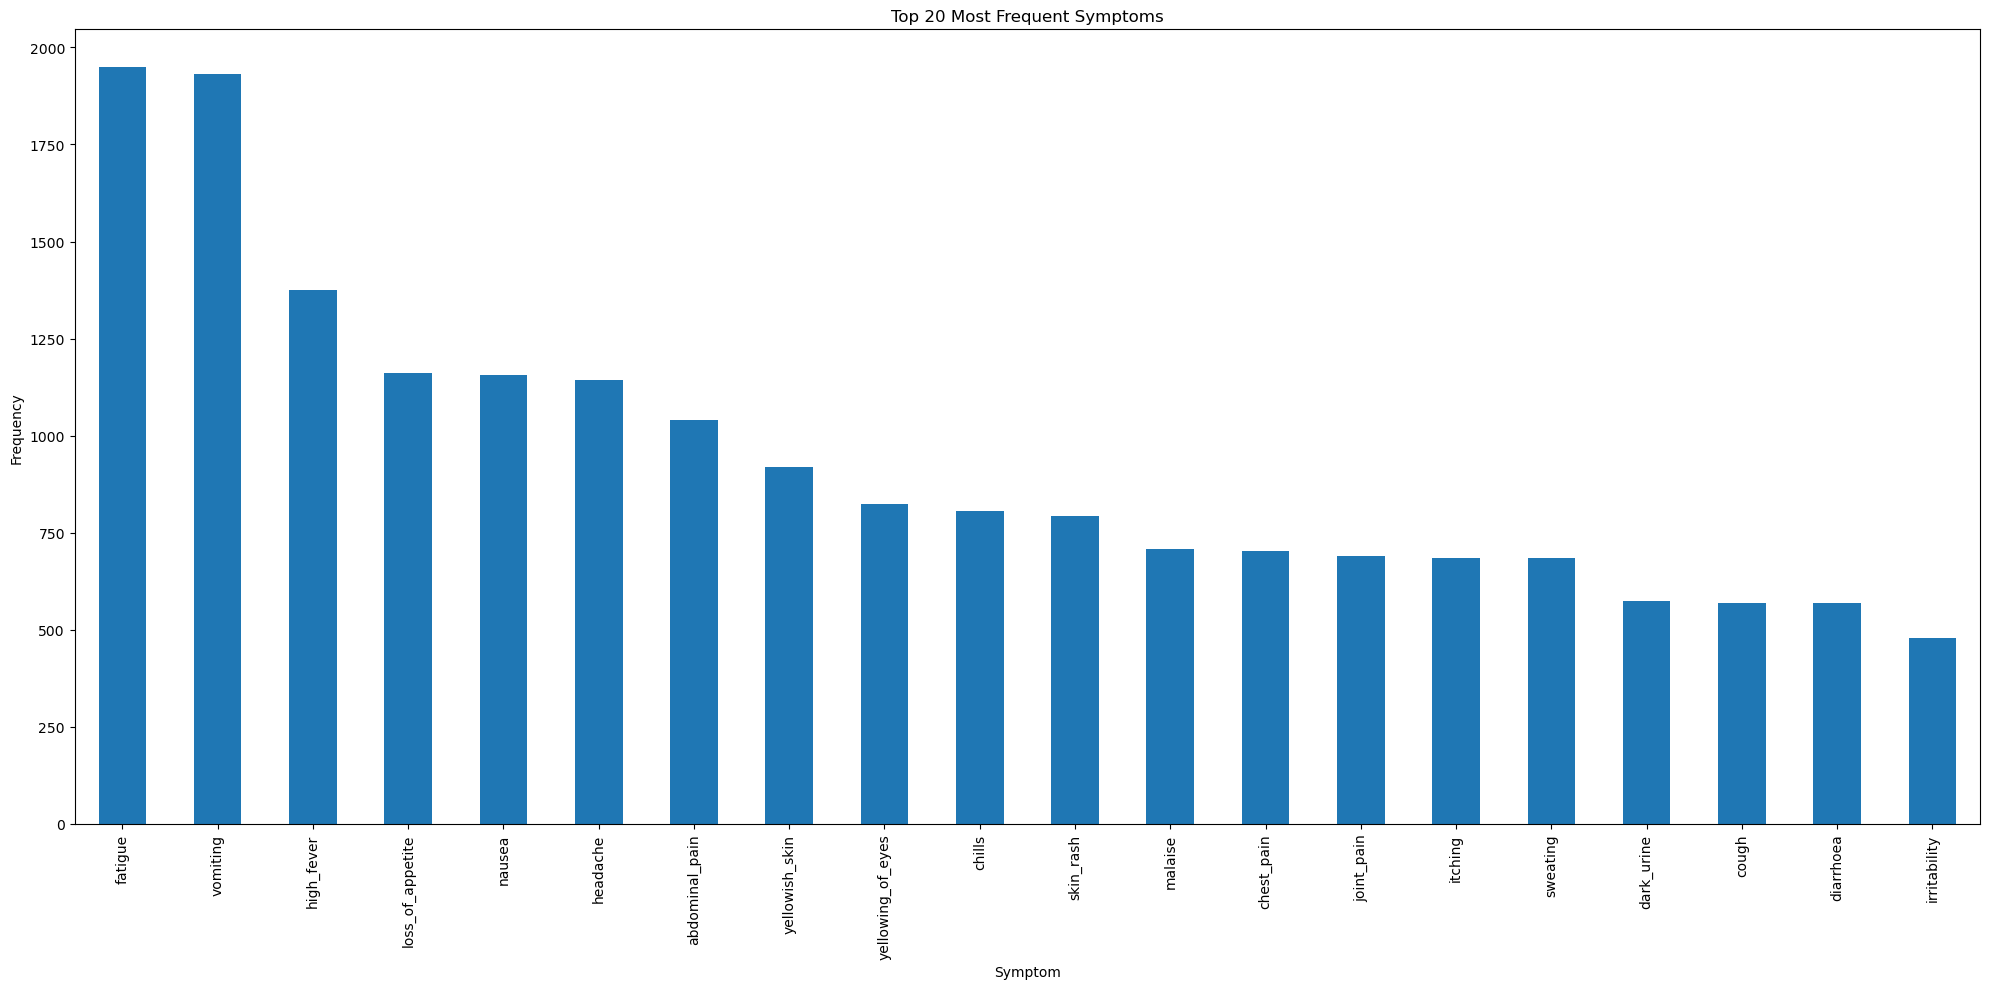

In [135]:
# Filter the top 20 most frequent symptoms
top_symptoms = symptom_frequencies.nlargest(20)

# Plot the top 20 symptoms
plt.figure(figsize=(20, 10))
top_symptoms.plot(kind='bar')
plt.title('Top 20 Most Frequent Symptoms')
plt.xlabel('Symptom')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


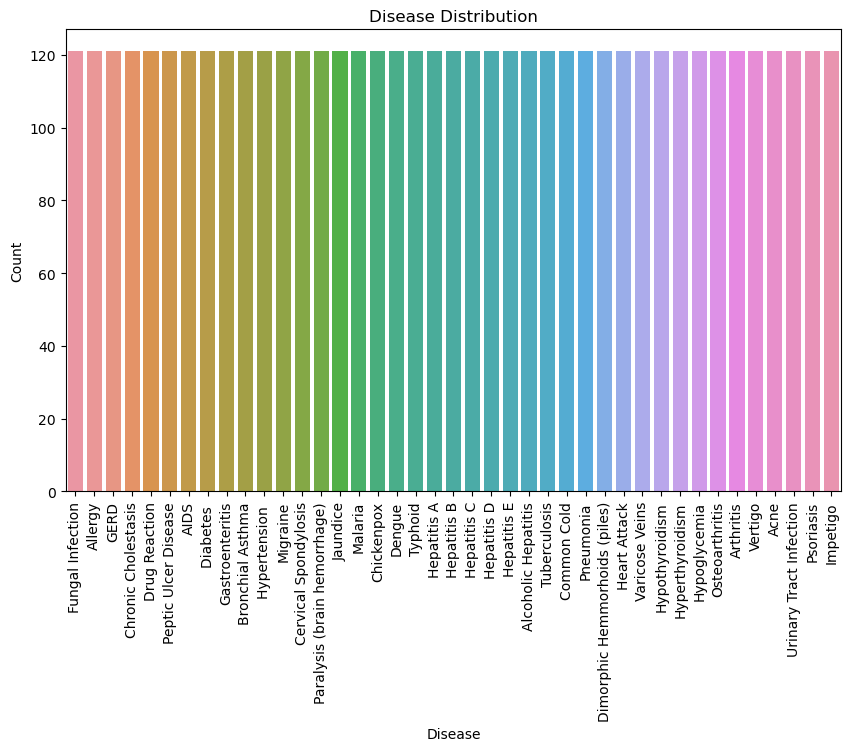

In [128]:
# Plot a bar chart for disease distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='prognosis', data=data)
plt.title('Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


## Feature Engineering

In [107]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

### Standardize features

In [108]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Selection and Training

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

### Using Random forest classifier with hyperparameter tuning

In [112]:
# Initialize the model
rf_model  = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}


# Perform grid search for hyperparameter tuning
rf_model = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
rf_pred  = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Model Performance:")
print("Accuracy:", np.mean(rf_pred == y_test))
print("Classification Report:\n", pd.crosstab(y_test, rf_pred, rownames=['Actual'], colnames=['Predicted']))

# Cross-validation
scores = cross_val_score(rfc, X_train, y_train, cv=10)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Random Forest Model Performance:
Accuracy: 1.0
Classification Report:
 Predicted  0   1   2   3   4   5   6   7   8   9   ...  31  32  33  34  35  \
Actual                                             ...                       
0          24   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1           0  24   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2           0   0  24   0   0   0   0   0   0   0  ...   0   0   0   0   0   
3           0   0   0  24   0   0   0   0   0   0  ...   0   0   0   0   0   
4           0   0   0   0  24   0   0   0   0   0  ...   0   0   0   0   0   
5           0   0   0   0   0  24   0   0   0   0  ...   0   0   0   0   0   
6           0   0   0   0   0   0  24   0   0   0  ...   0   0   0   0   0   
7           0   0   0   0   0   0   0  25   0   0  ...   0   0   0   0   0   
8           0   0   0   0   0   0   0   0  24   0  ...   0   0   0   0   0   
9           0   0   0   0   0   0   0   0   0  24  ...   0   0   0   0 

## Deep Learning Neural Network

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Train the Deep Learning model
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y_train)), activation='softmax')
])
dl_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dl_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2148 - loss: 3.1634 - val_accuracy: 0.9509 - val_loss: 1.0204
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8465 - loss: 0.9203 - val_accuracy: 1.0000 - val_loss: 0.1229
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9461 - loss: 0.3205 - val_accuracy: 1.0000 - val_loss: 0.0261
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9712 - loss: 0.1621 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.1128 - val_accuracy: 1.0000 - val_loss: 0.0051
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9832 - loss: 0.0861 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0800 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9882 - loss: 0.0570 - val_accuracy: 1.

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 1.9538e-06


In [115]:
# Evaluate the models
print("\nDeep Learning Model Performance:")
print("Accuracy:", np.mean(dl_pred == y_test))
print("Classification Report:\n", pd.crosstab(y_test, dl_pred, rownames=['Actual'], colnames=['Predicted']))


Deep Learning Model Performance:
Accuracy: 1.0
Classification Report:
 Predicted  0   1   2   3   4   5   6   7   8   9   ...  31  32  33  34  35  \
Actual                                             ...                       
0          24   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
1           0  24   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   
2           0   0  24   0   0   0   0   0   0   0  ...   0   0   0   0   0   
3           0   0   0  24   0   0   0   0   0   0  ...   0   0   0   0   0   
4           0   0   0   0  24   0   0   0   0   0  ...   0   0   0   0   0   
5           0   0   0   0   0  24   0   0   0   0  ...   0   0   0   0   0   
6           0   0   0   0   0   0  24   0   0   0  ...   0   0   0   0   0   
7           0   0   0   0   0   0   0  25   0   0  ...   0   0   0   0   0   
8           0   0   0   0   0   0   0   0  24   0  ...   0   0   0   0   0   
9           0   0   0   0   0   0   0   0   0  24  ...   0   0   0   0

In [116]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, dl_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.0725e-08 
Test Accuracy: 100.00%


In [ ]:
import shap

# Create a SHAP explainer for the Deep Learning model
explainer_dl = shap.KernelExplainer(model.predict, shap.sample(X_train, 100)) # Sample 100 background data points

# Get SHAP values for the test set
shap_values_dl = explainer_dl.shap_values(X_test)

# Plot the SHAP values for a specific instance
shap.force_plot(explainer_dl.expected_value[0], shap_values_dl[0,:], X_test.iloc[0,:], matplotlib=True)

In [117]:
# Save Random Forest model
joblib.dump(rf_model, 'rf_model.joblib')

# Save Deep Learning model
dl_model.save('dl_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the encoder
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']